<h1>Financial & Macroeconomic Events and Market Volatility - Part 2</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from itertools import combinations

We will read our featured stocks dataset

In [4]:
df=pd.read_csv("featured_stocks.csv", parse_dates=["Date"])

In [5]:
df.head()

Adj Close       Close        High         Low        Open     Volume  \
0  228.403641  250.179993  251.210007  245.949997  245.979996  126925200   
1  222.953308  244.210007  248.570007  243.669998  248.229996  144140700   
2  230.421234  252.389999  253.110001  247.169998  247.589996  142628800   
3  232.238068  254.380005  255.949997  251.690002  252.690002  103139100   
4  234.420029  256.769989  257.309998  254.000000  256.820007  102512600   

                       Date Stock  Daily Return  Rolling Volatility 7D  \
0 2019-01-02 00:00:00+00:00   SPY           NaN                    NaN   
1 2019-01-03 00:00:00+00:00   SPY     -0.023863                    NaN   
2 2019-01-04 00:00:00+00:00   SPY      0.033495                    NaN   
3 2019-01-07 00:00:00+00:00   SPY      0.007885                    NaN   
4 2019-01-08 00:00:00+00:00   SPY      0.009395                    NaN   

   Rolling Volatility 30D  Rolling Volatility 90D  
0                     NaN                     NaN  
1                     NaN                     NaN  
2                     NaN                     NaN  
3                     NaN                     NaN  
4                     NaN                     NaN

In [6]:
# Summary for Rolling Volatilities
for window in [7, 30, 90]:
    print(f"Summary Statistics for Rolling Volatility ({window}D):")
    print(df.groupby('Stock')[f"Rolling Volatility {window}D"].describe())

Summary Statistics for Rolling Volatility (7D):
        count      mean       std       min       25%       50%       75%  \
Stock                                                                       
AAPL   1462.0  0.017073  0.010010  0.003436  0.010867  0.014504  0.020794   
AMZN   1462.0  0.018985  0.010288  0.003555  0.012037  0.016782  0.022952   
BAC    1462.0  0.017747  0.012498  0.002059  0.010964  0.014932  0.020442   
CVX    1462.0  0.016845  0.013224  0.002018  0.010399  0.014157  0.018971   
GS     1462.0  0.016659  0.011078  0.003045  0.010828  0.013986  0.019391   
HD     1462.0  0.014233  0.010135  0.002265  0.008771  0.012027  0.016674   
JNJ    1462.0  0.010217  0.006930  0.002335  0.006541  0.008776  0.011963   
JPM    1462.0  0.015400  0.011976  0.001916  0.009133  0.012658  0.017926   
MSFT   1462.0  0.015950  0.009964  0.003625  0.009915  0.013949  0.019507   
NVDA   1462.0  0.029715  0.015007  0.005622  0.019551  0.026435  0.036973   
PFE    1462.0  0.014419  0.0

<h2>Exploratory Data Analysis Results</h2>
<h4>Rolling Volatility</h4>
The rolling volatility metrics, calculated over 7-day, 30-day, and 90-day windows, provided insights into both short-term and long-term risk dynamics: <br>
<ol>
    <li>
        7-Day Rolling Volatility:
        <ul>
            <li>This short-term metric captured rapid fluctuations in stock prices.</li>
            <li>TSLA exhibited the highest average 7-day rolling volatility of 3.58%, followed by NVDA at 2.97%.</li>
            <li>SPY maintained the lowest average 7-day rolling volatility at 1.01%, indicating overall market stability.</li>
        </ul>
    </li>
    <li>
        30-Day Rolling Volatility:
        <ul>
            <li>The medium-term view smoothed out short-term noise while capturing sustained trends.</li>
            <li>TSLA and NVDA continued to exhibit high volatility levels, with averages of 3.78% and 3.10%, respectively.</li>
            <li>JNJ and SPY remained the least volatile, with averages of 1.08% and 1.06%.</li>
        </ul>
    </li>
    <li>
        90-Day Rolling Volatility:
        <ul>
            <li>This long-term metric emphasized overall price stability over extended periods.</li>
            <li>TSLA led with an average volatility of 3.90%, while NVDA followed at 3.19%.</li>
            <li>JNJ and SPY had the lowest long-term volatilities at 1.15% and 1.13%, respectively.</li>
        </ul>
    </li>
</ol>


<h4>Sectoral Observations</h4>
The analysis revealed notable sector-specific trends: <br>
<ul>
    <li>Energy Stocks (e.g., SLB, CVX, XOM): <br>
        Displayed higher-than-average volatility, reflecting the sensitivity of energy markets to global oil prices and geopolitical factors.</li>
    <li>Tech Stocks (e.g., AAPL, MSFT, NVDA, TSLA): <br>
        Consistently ranked among the most volatile stocks across all rolling windows, particularly TSLA and NVDA.</li>
    <li>Healthcare Stocks (e.g., JNJ, PFE, UNH):  <br>
        Showed remarkable stability, ranking among the least volatile stocks in both short-term and long-term metrics.</li>
    <li>Financial Stocks (e.g., JPM, BAC, GS): <br>
        Exhibited moderate volatility, reflecting their sensitivity to macroeconomic conditions and interest rate policies.</li>
</ul>

<h4>Insights and Implications</h4> 
<ul> 
    <li>The technology sector, especially TSLA and NVDA, displayed the highest volatility, emphasizing their growth potential but also their riskiness. <br> This suggests that investors in tech stocks must be prepared for significant price fluctuations, particularly in response to financial events like Federal Reserve announcements or earnings reports.</li> 
    <li>Rolling volatility is a superior metric for understanding market risk, as it provides a dynamic view of short-, medium-, and long-term fluctuations. <br> Stocks like TSLA and NVDA, with consistently high volatilities, are more sensitive to financial events compared to stable stocks like SPY and JNJ, which exhibit muted reactions.</li> 
    <li>Sectoral differences in volatility highlight varied responses to financial and macroeconomic conditions: 
        <ul> <li>Energy stocks (e.g., SLB, CVX, XOM) are highly volatile due to global oil price dependencies and geopolitical risks.</li> 
            <li>Healthcare stocks (e.g., JNJ, PFE, UNH) maintain stability, reaffirming their role as defensive investments during market turbulence.</li>           
            <li>Financial stocks (e.g., JPM, BAC, GS) exhibit moderate volatility, reflecting their sensitivity to interest rate changes and macroeconomic trends.</li> 
        </ul> 
    </li> 
    <li>The low volatility of SPY, representing the overall market, indicates that market-wide risks are relatively contained compared to individual sectors. <br> This makes SPY a benchmark for evaluating sector-specific or stock-specific reactions to financial events.</li> 
</ul>

We can now take look at the trend of rolling volatilities for the 2 most volatile stocks NVDA and TSLA, and the least volatile stock JNJ, and SPY represeting the overall market.

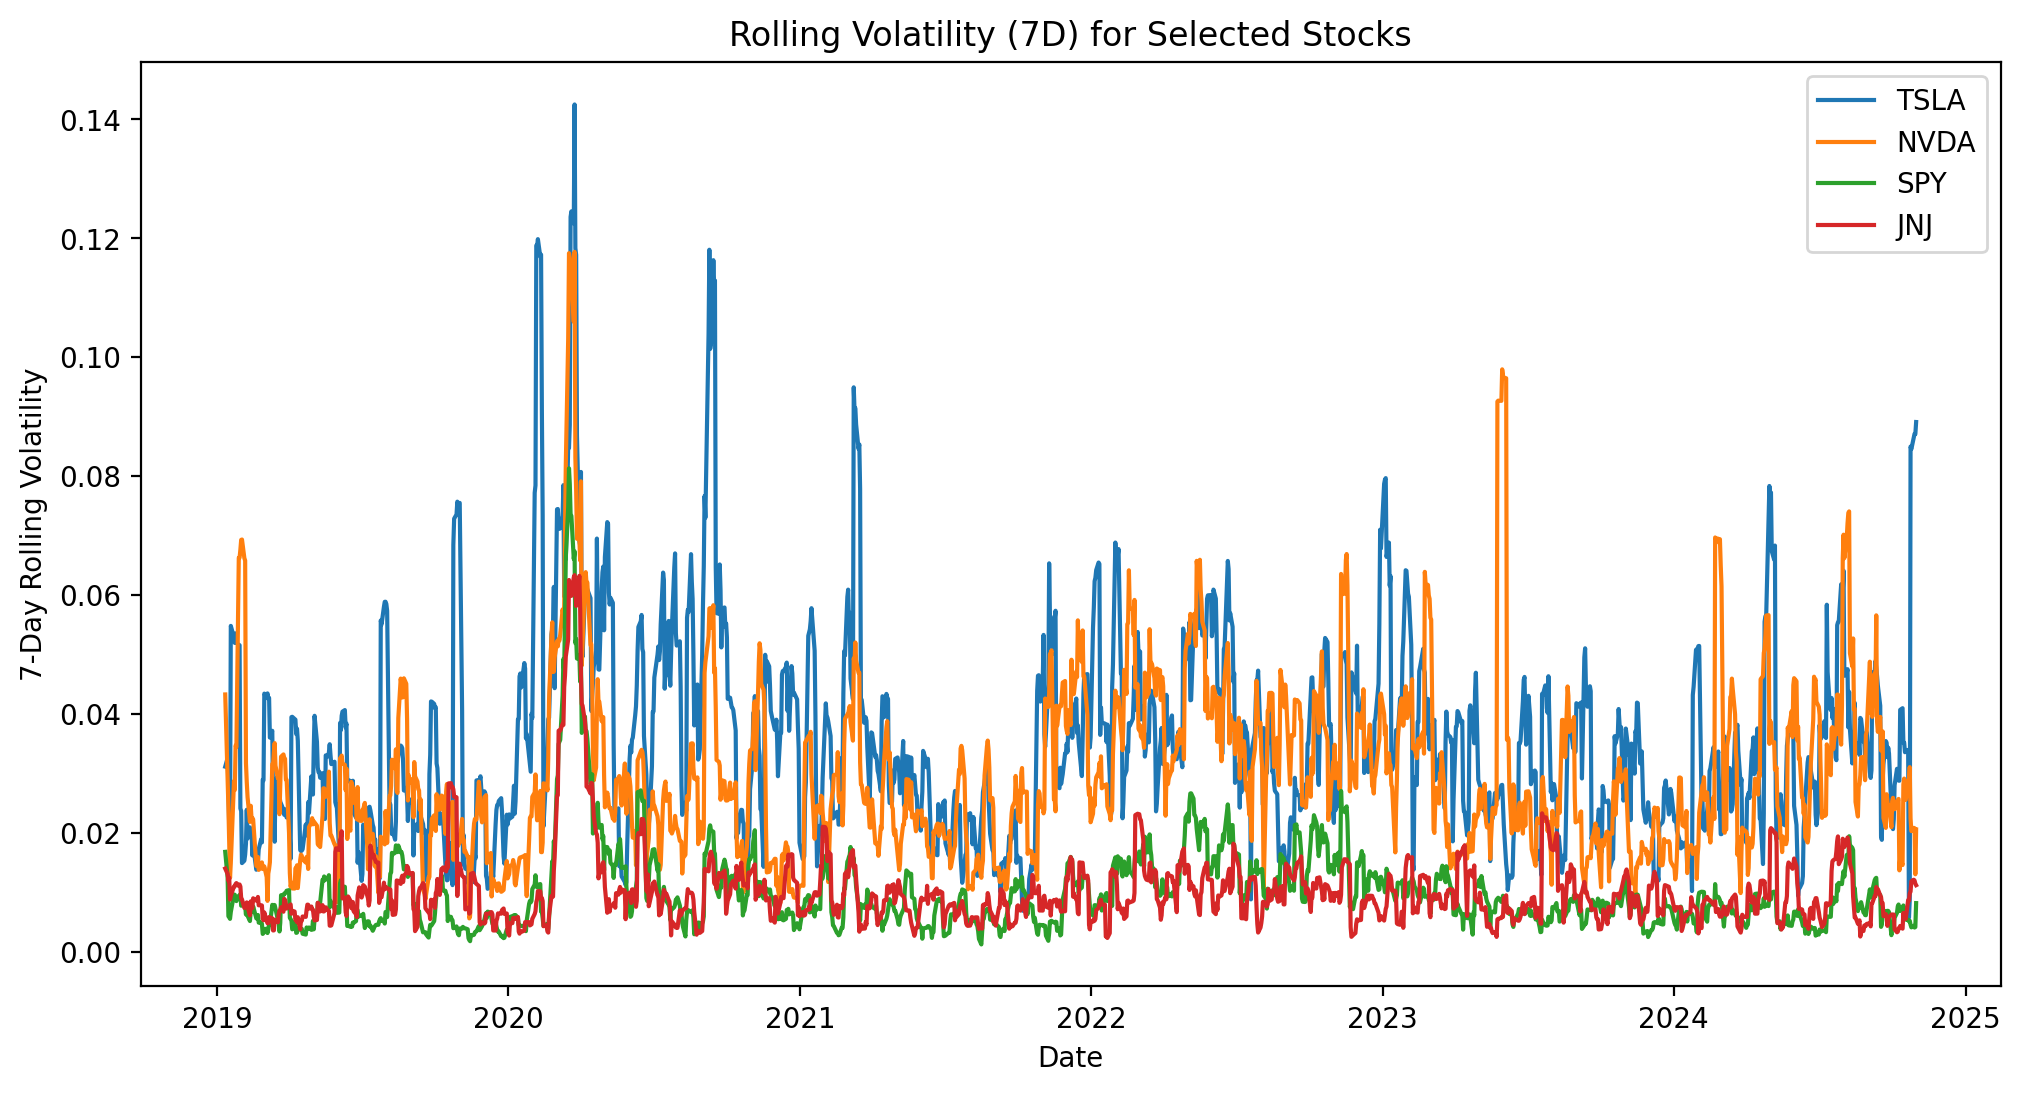

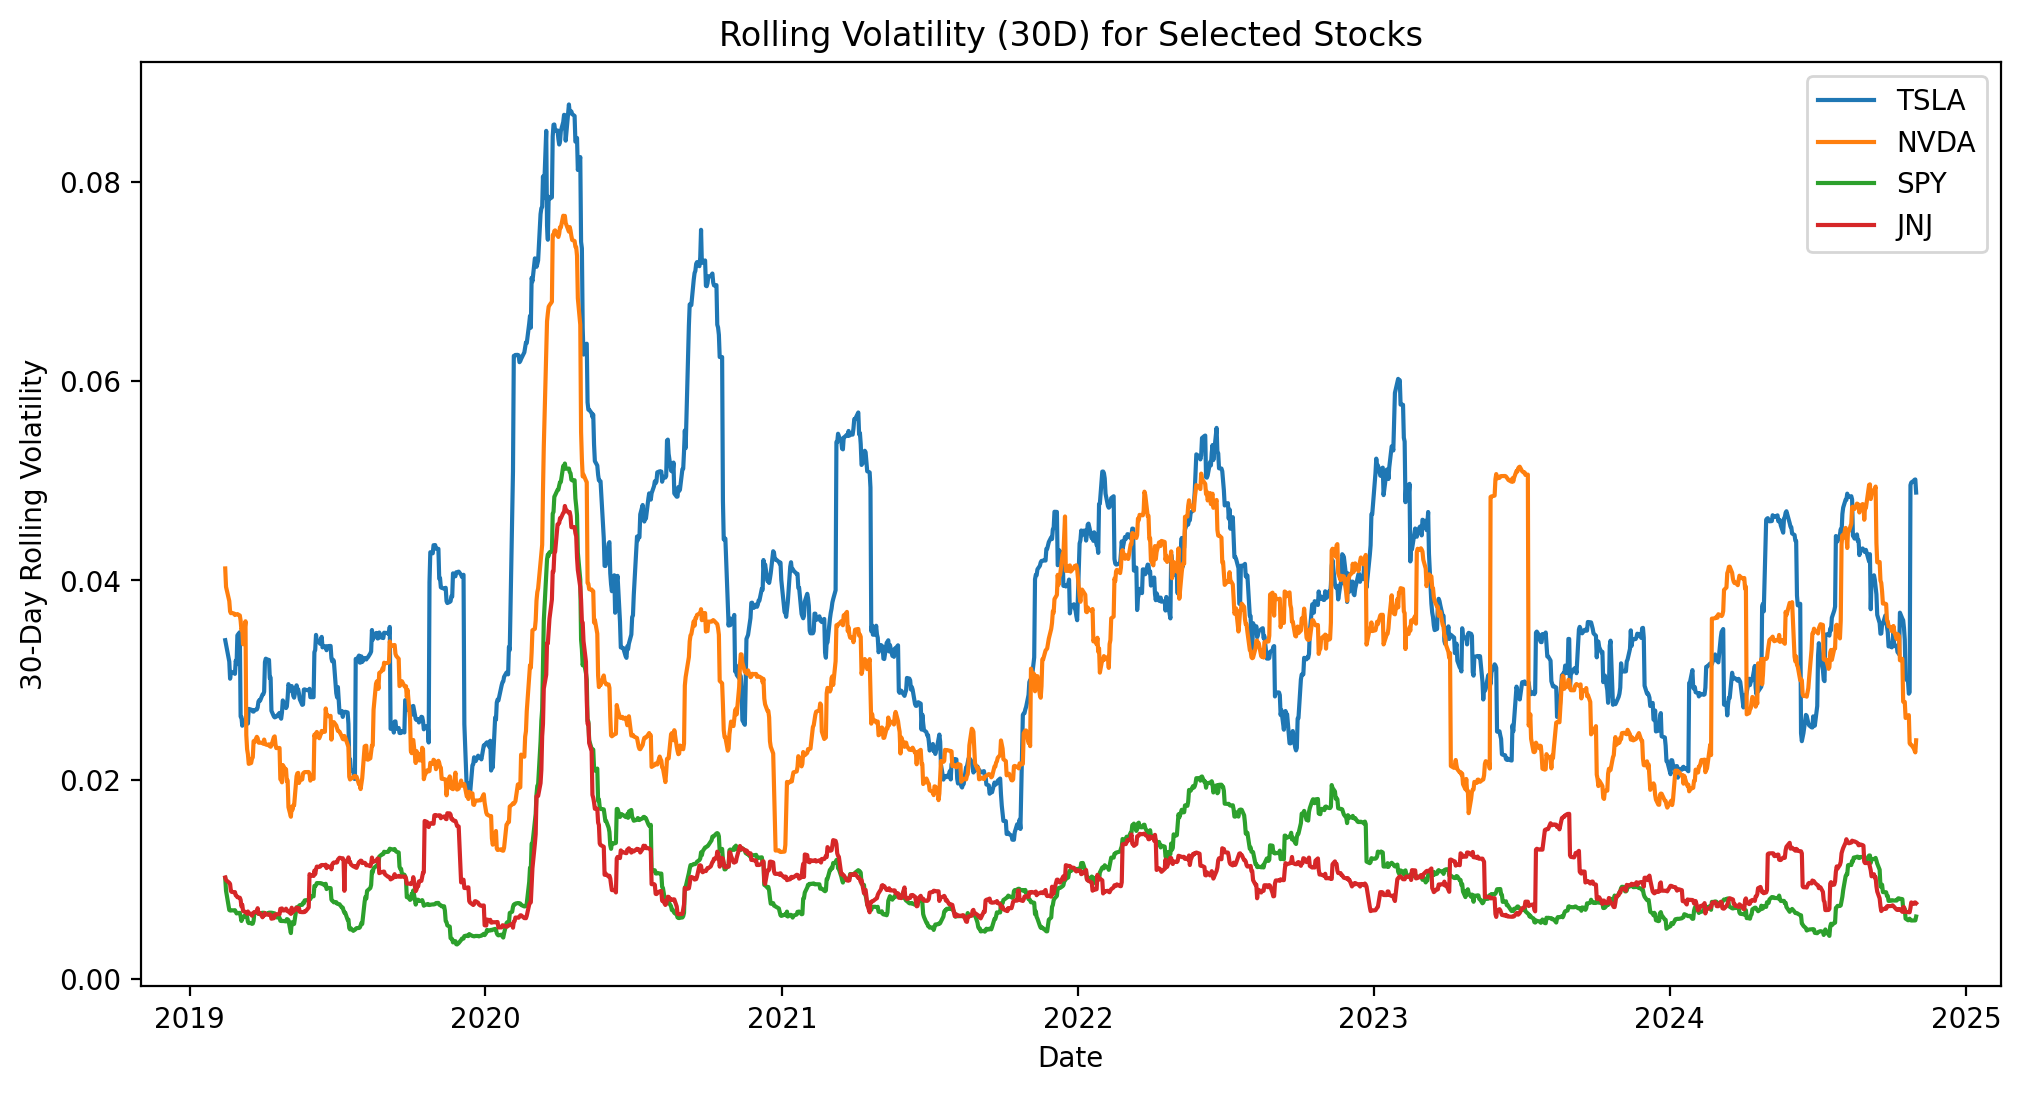

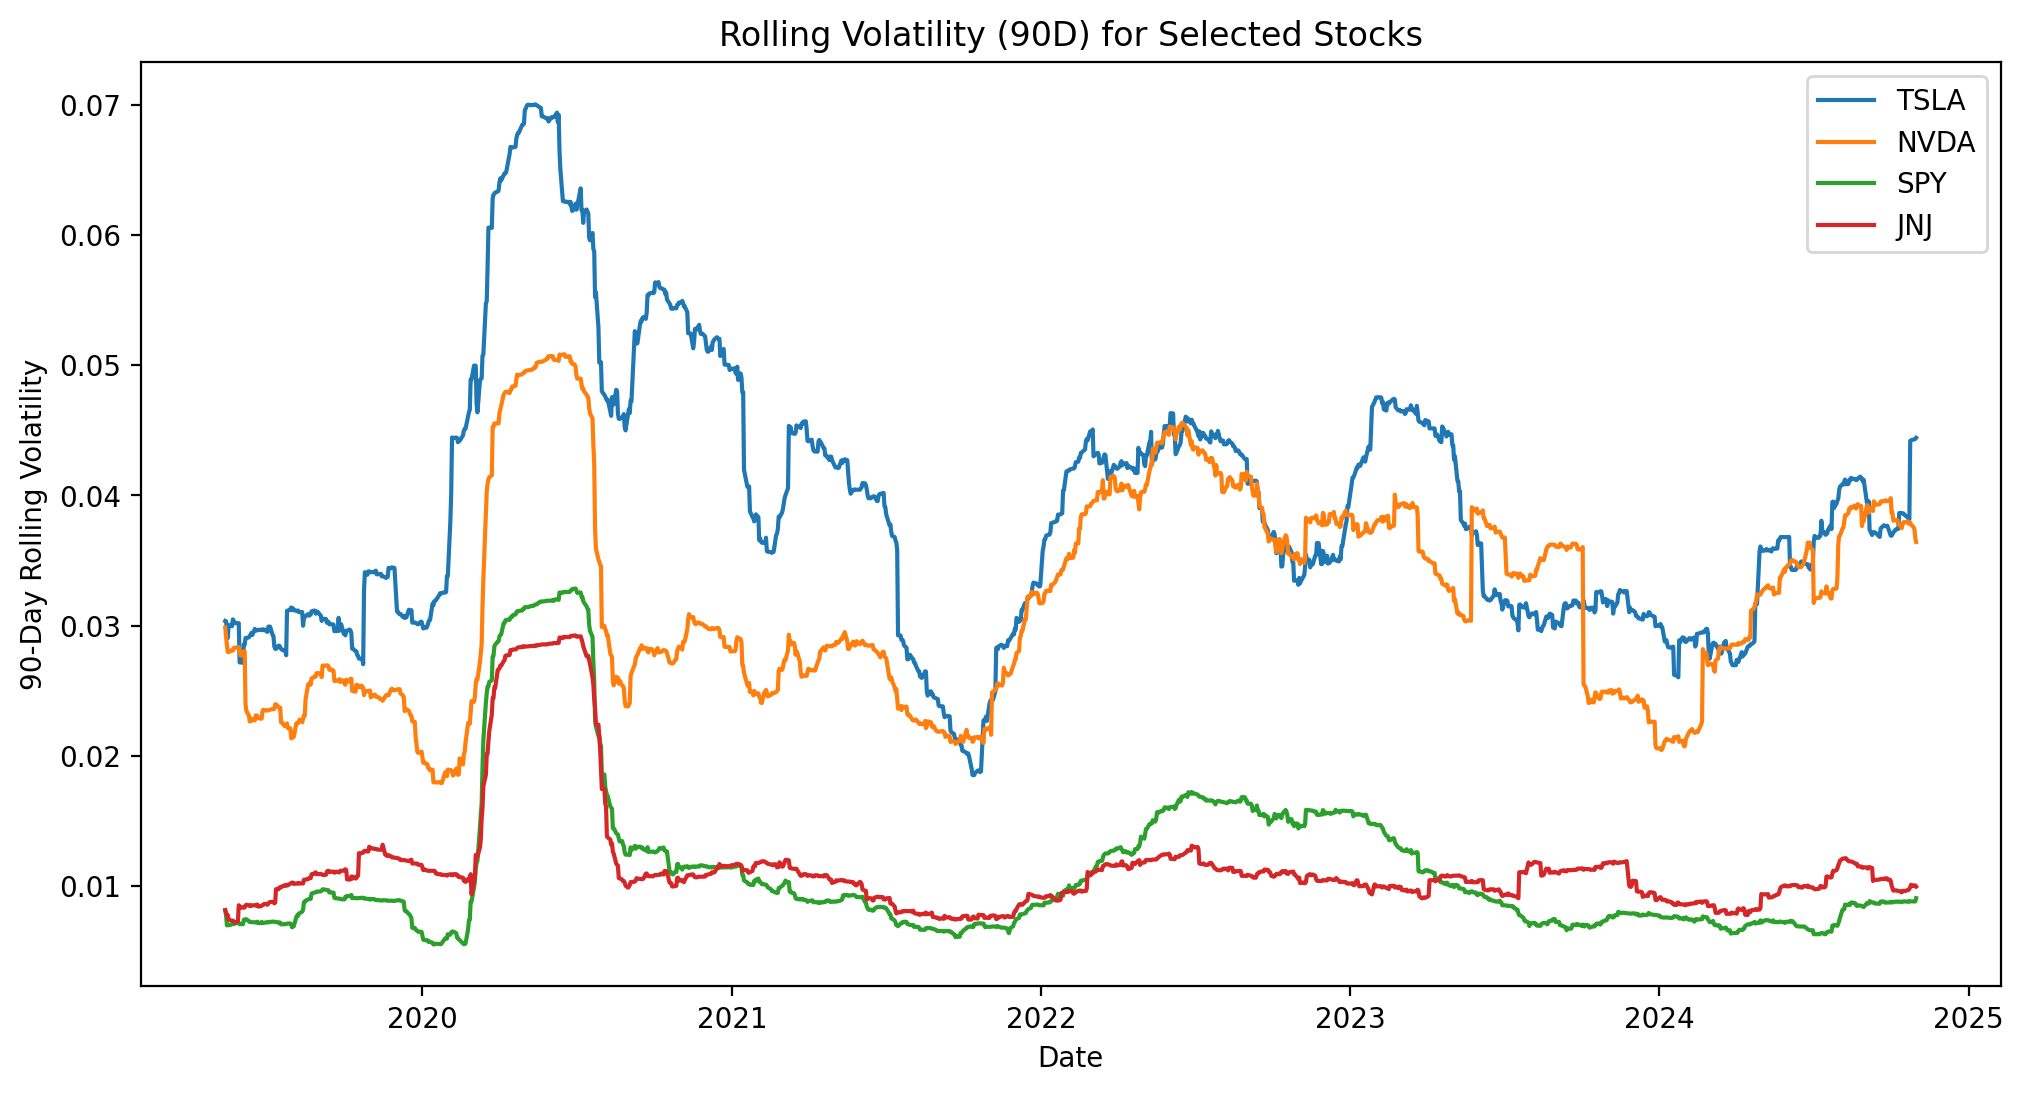

In [9]:
stocks_to_plot = ['TSLA', 'NVDA', 'SPY', 'JNJ']

for window in [7, 30, 90]:
    plt.figure(figsize=(12, 6), dpi=200)
    for stock in stocks_to_plot:
        subset = df[df['Stock'] == stock]
        plt.plot(subset['Date'], subset[f'Rolling Volatility {window}D'], label=f"{stock}")

    plt.title(f"Rolling Volatility ({window}D) for Selected Stocks")
    plt.xlabel("Date")
    plt.ylabel(f"{window}-Day Rolling Volatility")
    plt.legend()
    plt.savefig(f"Graphs/Rolling Volatility ({window}D) for Selected Stocks.jpg",dpi=200)
    plt.show()

<h2>Observations</h2>
<h4>Event Impacts on Volatility:</h4>
<ul>
    <li>March 2020 (COVID-19 Crash): All four stocks showed a significant spike in volatility, with short-term volatilities peaking sharply. High-volatility stocks like TSLA and NVDA saw much larger and more frequent fluctuations compared to SPY and JNJ.</li>
    <li>Post-2021 Trends: Volatility remained elevated for all stocks after 2021, with notable fluctuations starting around early 2022, likely driven by the Federal Reserve’s interest rate hikes.</li>
</ul>


<h4>SPY as a Stability Indicator:</h4>
<uL>
    <li>Despite event-driven spikes, SPY consistently displayed lower volatility levels compared to individual stocks, reaffirming its role as a market stability benchmark.</li>
</uL>

In [11]:
stocks=list(df["Stock"].unique())

We will analyze 6 financial and macroecomic events:
<ul>
    <li>March 2020 (COVID-19 market crash)</li>
    <li>December 2020 (Stimulus Package Announcement)</li>
    <li>January 2022 (Start of Fed Rate Hikes)</li>
    <li>October 2022 (Midterm Elections Market Reaction)</li>
    <li>March 2023 (Banking Sector Crisis)</li>
    <li>October 2023 (AI and Tech Sector Boom)</li>
</ul>

For each financial event and stock, we are comparing the mean rolling volatilities (30-day window) before and after the event. We aim to determine if there is a statistically significant difference in volatility, which would suggest that the event had an impact.

This is done using a two-sample t-test assuming unequal variances (Welch’s t-test), comparing two independent samples: pre-event volatilities and post-event volatilities.

For each event and stock:

Null Hypothesis ($H_0$): $\mu_{pre} = \mu_{post}$ (i.e. the mean pre-event volatility is equal to the mean post-event volatility. This implies the event did not significantly impact volatility.)<br>

Alternate Hypothesis ($H_1$):  $\mu_{pre} \neq \mu_{post}$ (i.e. the mean pre-event volatility is not equal to the mean post-event volatility. This implies the event had a significant impact on volatility.)

We will use a significance level of $\alpha = 0.05$ and form a 95% confidence interval

In [14]:
# Define pre- and post-event periods for each of the 5 events
pre_event = {
    "covid": df[(df['Date'] >= "2019-03-01") & (df['Date'] < "2020-03-01")],
    "stimulus": df[(df['Date'] >= "2019-12-01") & (df['Date'] < "2020-12-01")],
    "rate_hikes": df[(df['Date'] >= "2021-01-01") & (df['Date'] < "2022-01-01")],
    "midterm_elections": df[(df['Date'] >= "2021-10-01") & (df['Date'] < "2022-10-01")],
    "banking_crisis": df[(df['Date'] >= "2022-03-01") & (df['Date'] < "2023-03-01")],
    "tech_earnings": df[(df['Date'] >= "2022-10-01") & (df['Date'] < "2023-10-01")]
    
}

post_event = {
    "covid": df[(df['Date'] >= "2020-03-01") & (df['Date'] < "2021-03-01")],
    "stimulus": df[(df['Date'] >= "2020-12-01") & (df['Date'] < "2021-12-01")],
    "rate_hikes": df[(df['Date'] >= "2022-01-01") & (df['Date'] < "2023-01-01")],
    "midterm_elections": df[(df['Date'] >= "2022-10-01") & (df['Date'] < "2023-10-01")],
    "banking_crisis": df[(df['Date'] >= "2023-03-01") & (df['Date'] < "2024-03-01")],
    "tech_earnings": df[(df['Date'] >= "2023-10-01") & (df['Date'] < "2024-10-01")]
}


In [15]:
for e in pre_event:
    print(e,end=" ")

covid stimulus rate_hikes midterm_elections banking_crisis tech_earnings 

In [16]:
events="covid stimulus rate_hikes midterm_elections banking_crisis tech_earnings".split()
results_30D={}
results_7D={}
results_90D={}
for stock in stocks:
    results_30D[stock]={}
    results_7D[stock]={}
    results_90D[stock]={}
    for event in events:
        results_30D[stock][event]={"pre_event":{},"post_event":{}}
        results_7D[stock][event]={"pre_event":{},"post_event":{}}
        results_90D[stock][event]={"pre_event":{},"post_event":{}}
results={"30":results_30D,
        "7":results_7D,
        "90":results_90D}

In [17]:
#for every event for each stock we calculate the pre-event and post-even mean volatilities and confidence intervals, and the t-stat and p-value 
def calculate(window):
    """
    Function to calculate the pre-event and post-even mean volatilities along with their confidence intervals, perform a t-test to test the hypothesis
    that pre and post event volatilities are significantly different
    """
    for event in events: 
        print(event)
        print("____________________________________________________________________________________________________")
        for stock in stocks:
            pre_volatility = pre_event[event][pre_event[event]['Stock'] == stock][f'Rolling Volatility {window}D'].dropna()
            post_volatility = post_event[event][post_event[event]['Stock'] == stock][f'Rolling Volatility {window}D'].dropna()
            
            # calculating confidence intervals
            pre_mean = pre_volatility.mean()
            pre_ci = stats.t.interval(0.95, len(pre_volatility)-1, loc=pre_mean, scale=stats.sem(pre_volatility))
            
            post_mean = post_volatility.mean()
            post_ci = stats.t.interval(0.95, len(post_volatility)-1, loc=post_mean, scale=stats.sem(post_volatility))
            
            print(f"{stock} Pre-Event: Mean = {pre_mean}, 95% CI = {pre_ci}")
            print(f"{stock} Post-Event: Mean = {post_mean}, 95% CI = {post_ci}")
            
            # perform t-test
            t_stat, p_value = stats.ttest_ind(pre_volatility, post_volatility, equal_var=False)
            print(f"T-statistic = {t_stat}, p-value = {p_value}")
            
            results[f"{window}"][stock][event]["pre_event"]["mean"]=pre_mean
            results[f"{window}"][stock][event]["pre_event"]["CI_95"]=pre_ci
            
            results[f"{window}"][stock][event]["post_event"]["mean"]=post_mean
            results[f"{window}"][stock][event]["post_event"]["CI_95"]=post_ci
    
            results[f"{window}"][stock][event]["t_stat"]=t_stat
            results[f"{window}"][stock][event]["p_value"]=p_value
            
            print("----------------------------------------------------------------------------------------------------------")
            print()
        print()

In [18]:
# (30 day rolling window)
calculate(30)

covid
____________________________________________________________________________________________________
SPY Pre-Event: Mean = 0.007254452050304849, 95% CI = (0.00695640898169459, 0.007552495118915107)
SPY Post-Event: Mean = 0.017154936536042317, 95% CI = (0.0155996707418041, 0.018710202330280534)
T-statistic = -12.31333242337878, p-value = 6.409207169423272e-28
----------------------------------------------------------------------------------------------------------

AAPL Pre-Event: Mean = 0.01460762196843815, 95% CI = (0.014171917867265313, 0.015043326069610988)
AAPL Post-Event: Mean = 0.027357892175814677, 95% CI = (0.02587323284189782, 0.028842551509731536)
T-statistic = -16.2295925453026, p-value = 1.0834964080665882e-42
----------------------------------------------------------------------------------------------------------

MSFT Pre-Event: Mean = 0.011787013801296087, 95% CI = (0.011404186576110817, 0.012169841026481358)
MSFT Post-Event: Mean = 0.0244872930092487, 95% CI = (0

In [19]:
# (7 day rolling window)
calculate(7)

covid
____________________________________________________________________________________________________
SPY Pre-Event: Mean = 0.006946454669933927, 95% CI = (0.00646759026316353, 0.007425319076704325)
SPY Post-Event: Mean = 0.015884565608903, 95% CI = (0.01405922021005268, 0.01770991100775332)
T-statistic = -9.328307066691897, p-value = 3.1647316563357334e-18
----------------------------------------------------------------------------------------------------------

AAPL Pre-Event: Mean = 0.014313191007918736, 95% CI = (0.013578601840337169, 0.015047780175500304)
AAPL Post-Event: Mean = 0.025815658222632525, 95% CI = (0.023821511862822924, 0.027809804582442126)
T-statistic = -10.659996871036782, p-value = 7.103014576557323e-23
----------------------------------------------------------------------------------------------------------

MSFT Pre-Event: Mean = 0.01158922068068387, 95% CI = (0.010936903146814728, 0.01224153821455301)
MSFT Post-Event: Mean = 0.022888532489294948, 95% CI = (

In [20]:
# (90 day rolling window)
calculate(90)

covid
____________________________________________________________________________________________________
SPY Pre-Event: Mean = 0.007779475299653105, 95% CI = (0.007603574460874346, 0.007955376138431865)
SPY Post-Event: Mean = 0.01903555478181497, 95% CI = (0.017899721153917515, 0.020171388409712426)
T-statistic = -19.28828911444661, p-value = 3.408466236540046e-52
----------------------------------------------------------------------------------------------------------

AAPL Pre-Event: Mean = 0.015258221269527876, 95% CI = (0.015018696566368275, 0.015497745972687478)
AAPL Post-Event: Mean = 0.028677865512092327, 95% CI = (0.02788658549362579, 0.029469145530558863)
T-statistic = -31.97214703146656, p-value = 8.176019578956957e-98
----------------------------------------------------------------------------------------------------------

MSFT Pre-Event: Mean = 0.012248318410908735, 95% CI = (0.012059328608305293, 0.012437308213512178)
MSFT Post-Event: Mean = 0.026218588324223312, 95% CI

We will make event wise graphs of the pre and post event mean volatilities for each stock

In [22]:
def plot(window):
    """
    Function to make event wise plot for pre and post event volatilities for each stock
    """
    for stock in stocks:
        pre_event_means = []
        post_event_means = []
        for event in results[f"{window}"][stock]:
            pre_event_means.append(results[f"{window}"][stock][event]["pre_event"]["mean"])
            post_event_means.append(results[f"{window}"][stock][event]["post_event"]["mean"])
        
        events = ['COVID-19', 'Stimulus', 'Rate Hikes', 'Midterm Elections', 'Banking Crisis', 'Tech Earnings']
        volatility_change = [post - pre for pre, post in zip(pre_event_means, post_event_means)]
        
        x = np.arange(len(events))
        bar_width = 0.35
        
        plt.figure(figsize=(10, 6))
        bars_pre = plt.bar(x - bar_width / 2, pre_event_means, bar_width, label='Pre-Event Volatility', color='skyblue')
        bars_post = plt.bar(x + bar_width / 2, post_event_means, bar_width, label='Post-Event Volatility', color='coral')
        
        for bar, value in zip(bars_pre, pre_event_means):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.5f}', 
                     ha='center', va='bottom', fontsize=10, color='black')
        for bar, value in zip(bars_post, post_event_means):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.5f}', 
                     ha='center', va='bottom', fontsize=10, color='black')
        
        # Add labels and legend
        plt.title(f'Pre and Post Event {stock} Volatility ({window}D)', fontsize=14)
        plt.ylabel('Volatility', fontsize=12)
        plt.xlabel('Event', fontsize=12)
        plt.xticks(x, events, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'Graphs/Pre and Post Event {stock} Volatility ({window}D).jpg',dpi=200)
        plt.show()

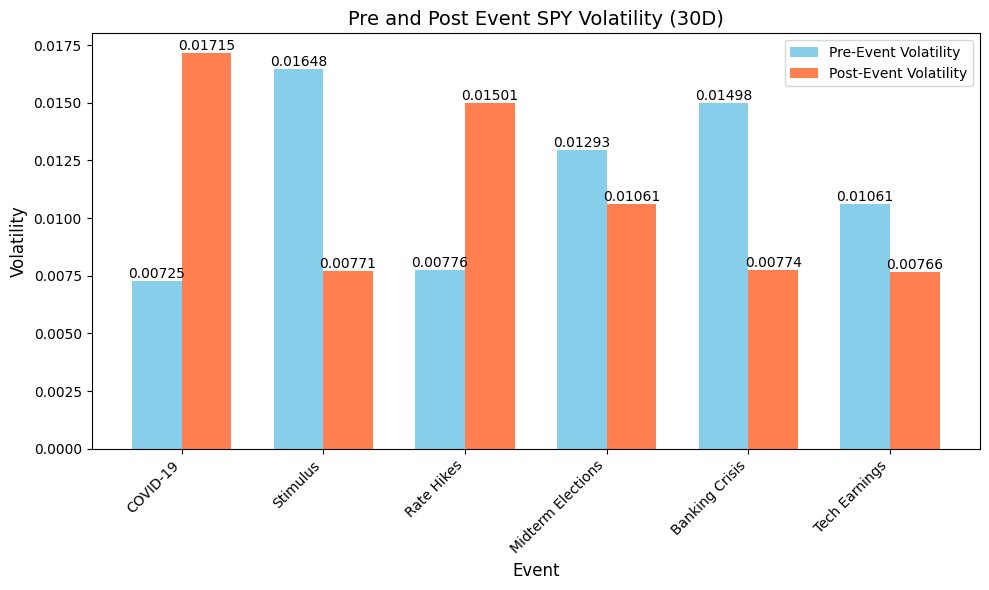

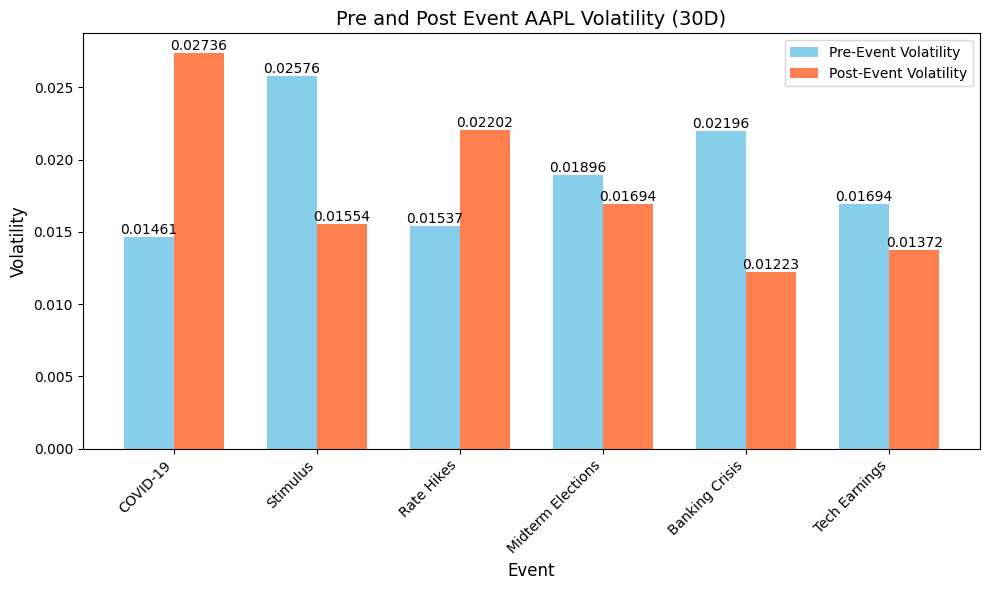

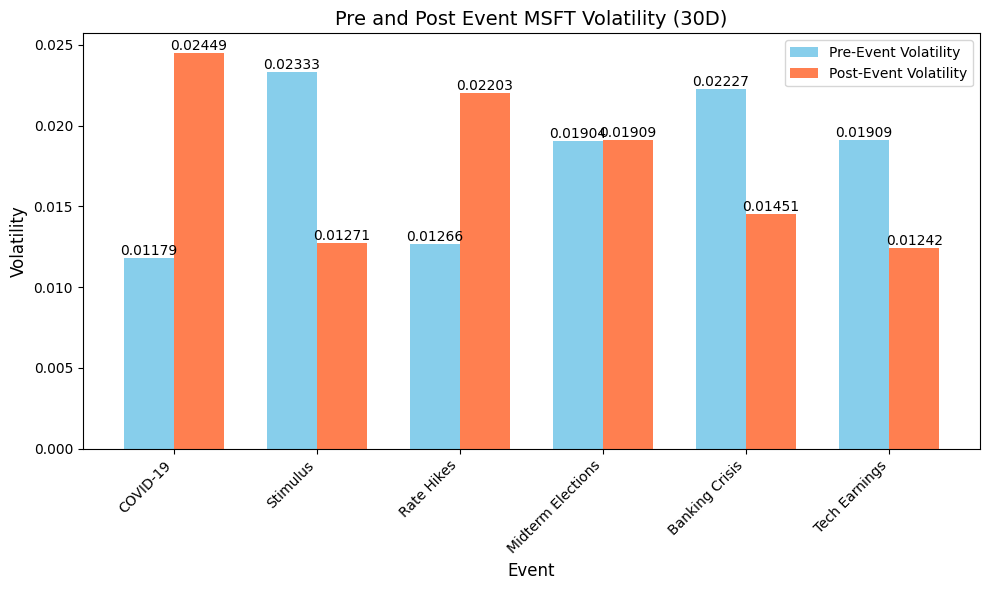

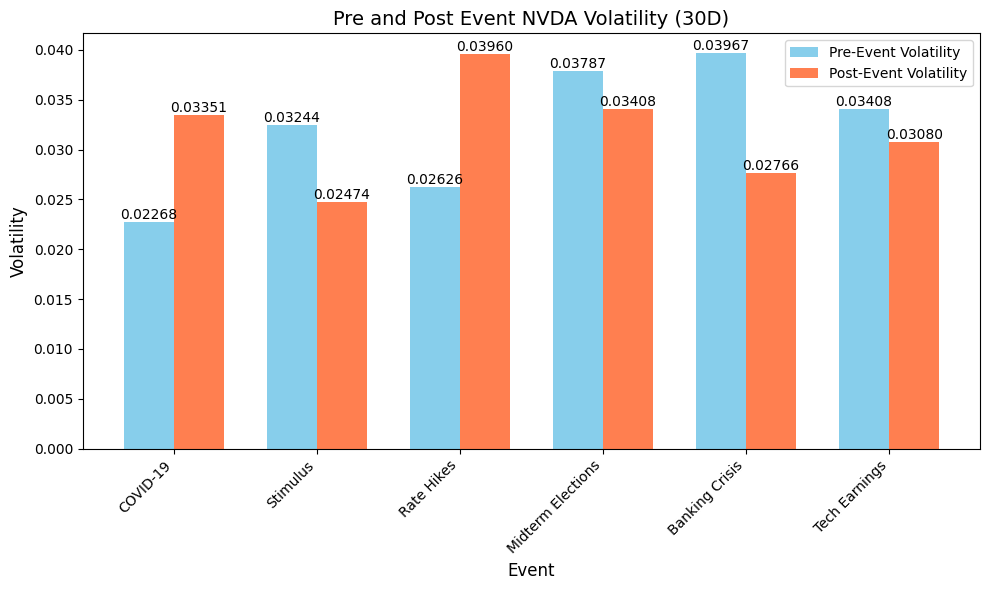

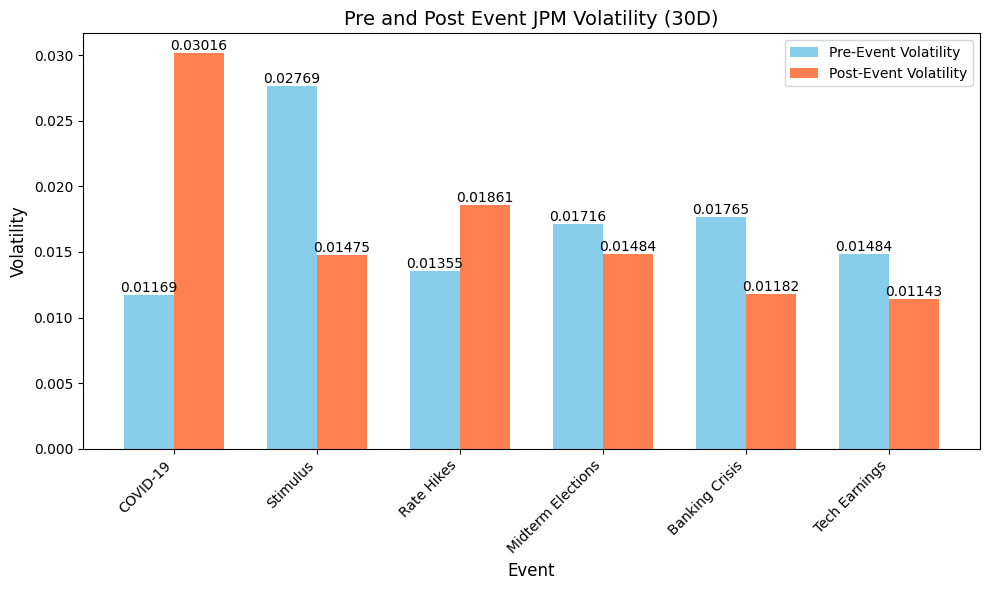

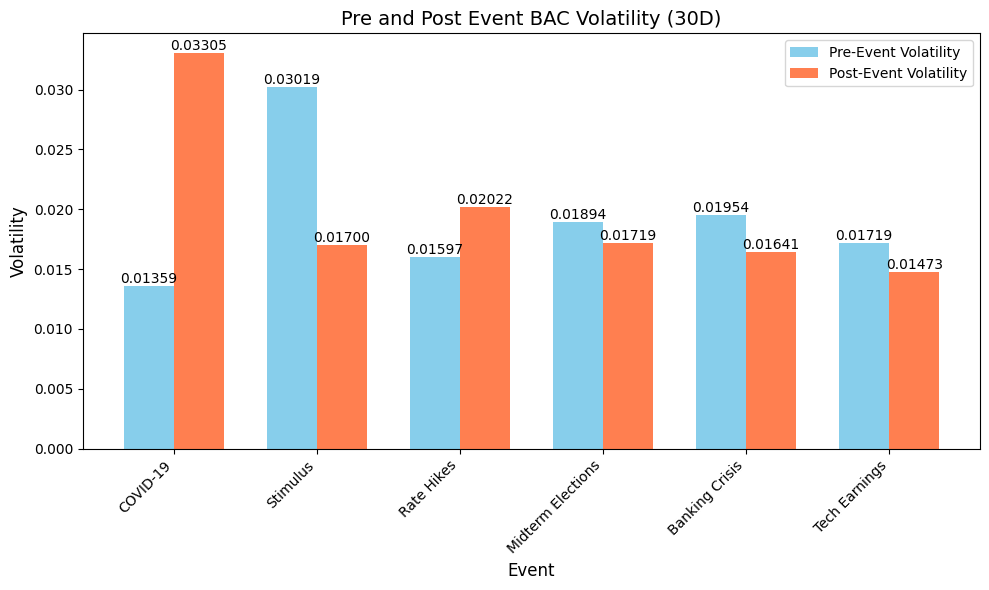

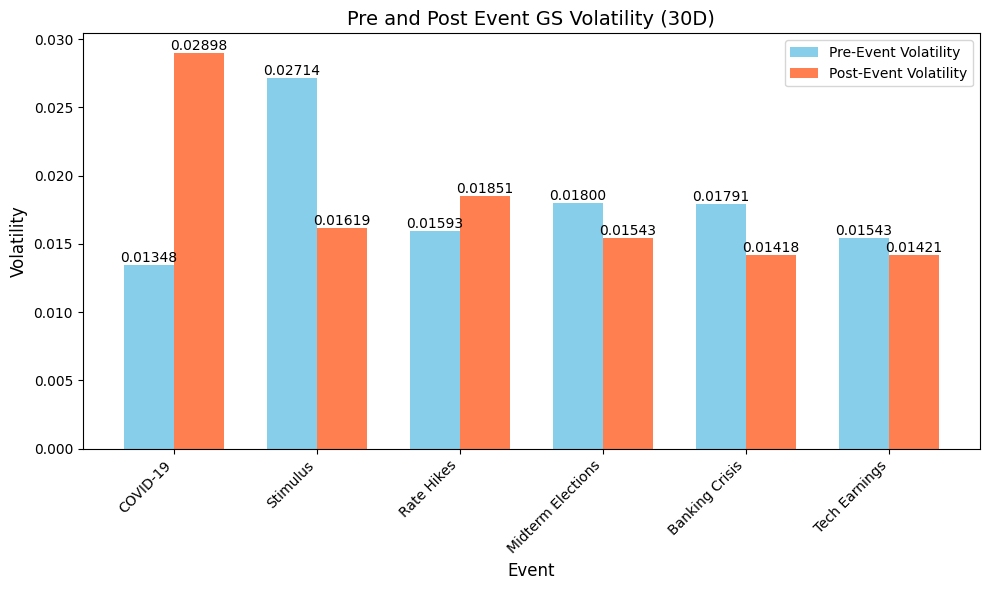

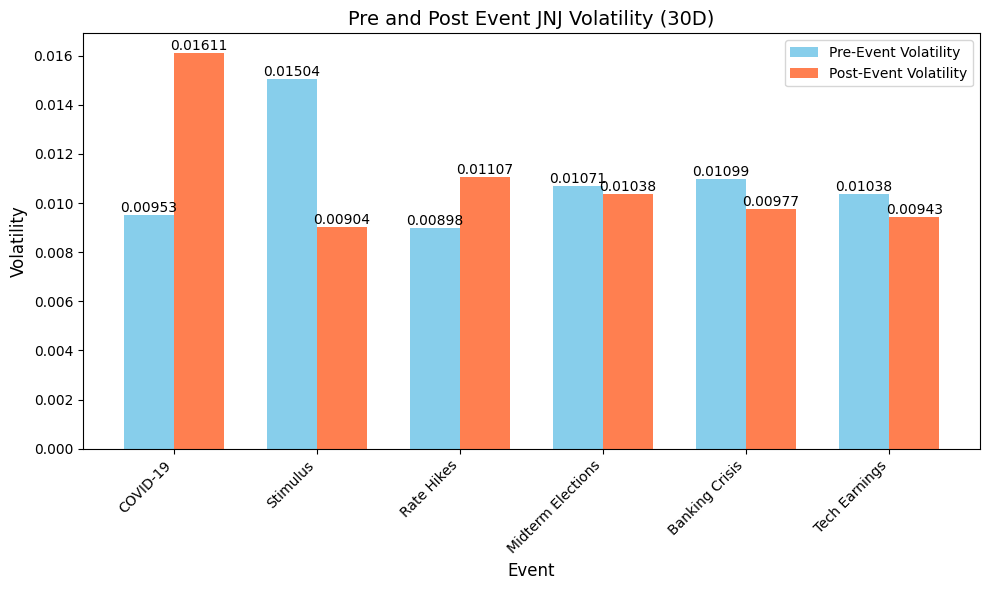

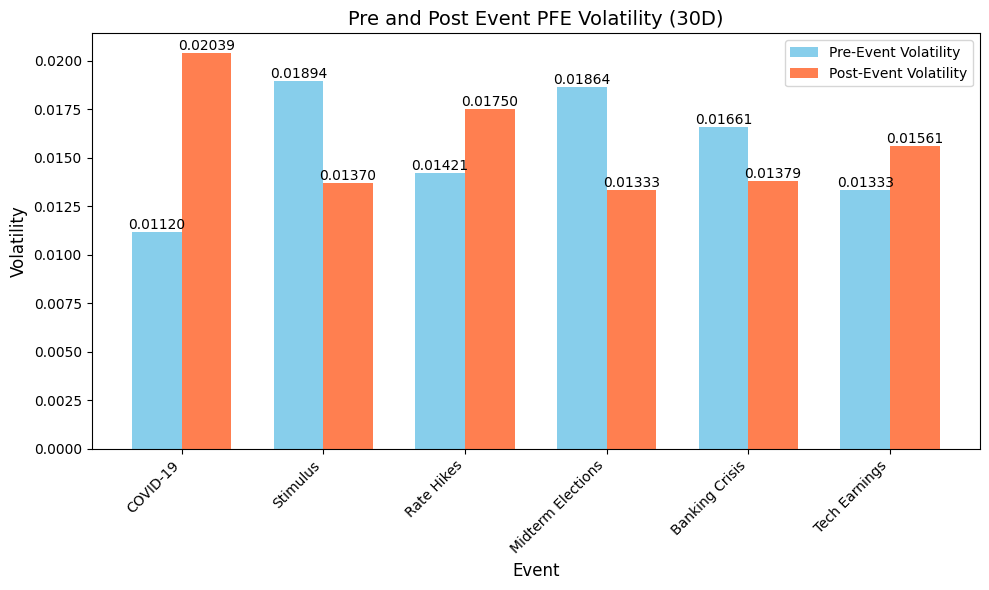

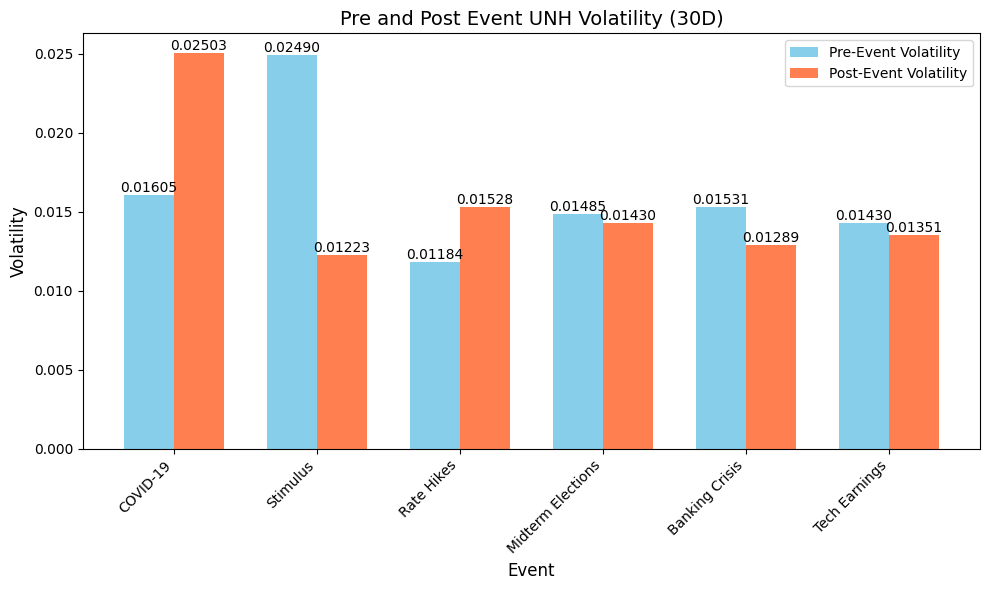

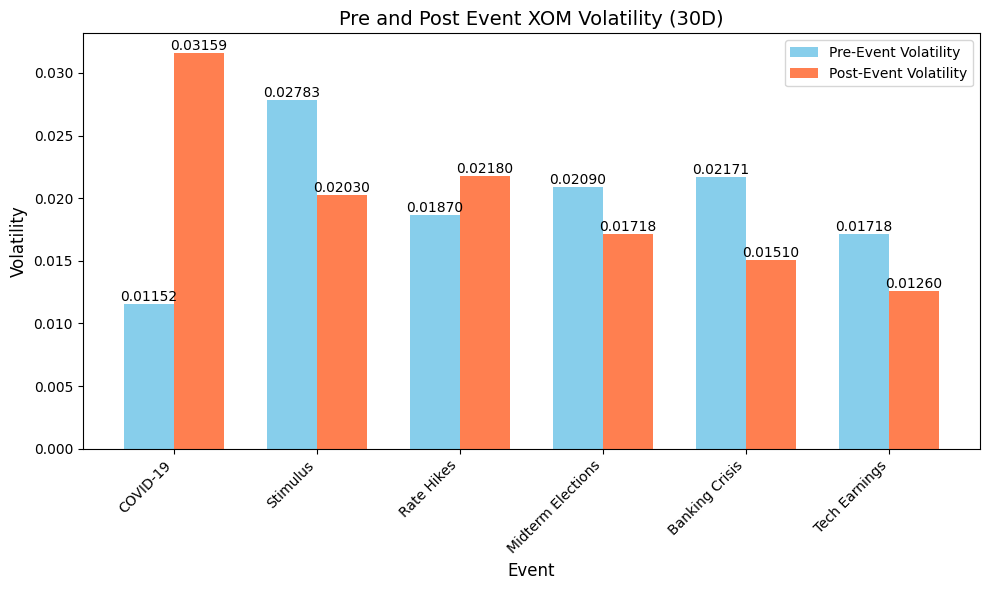

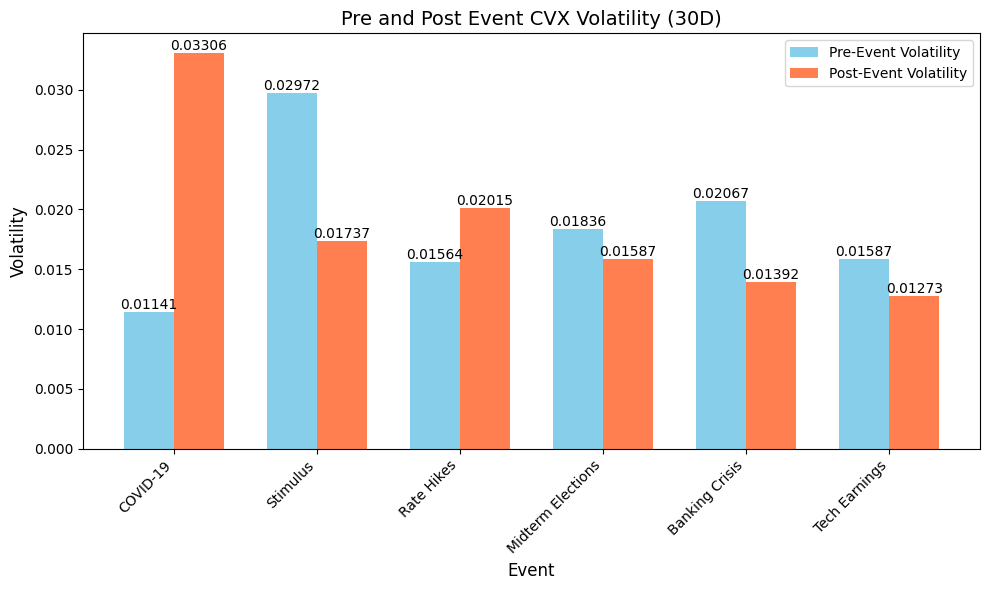

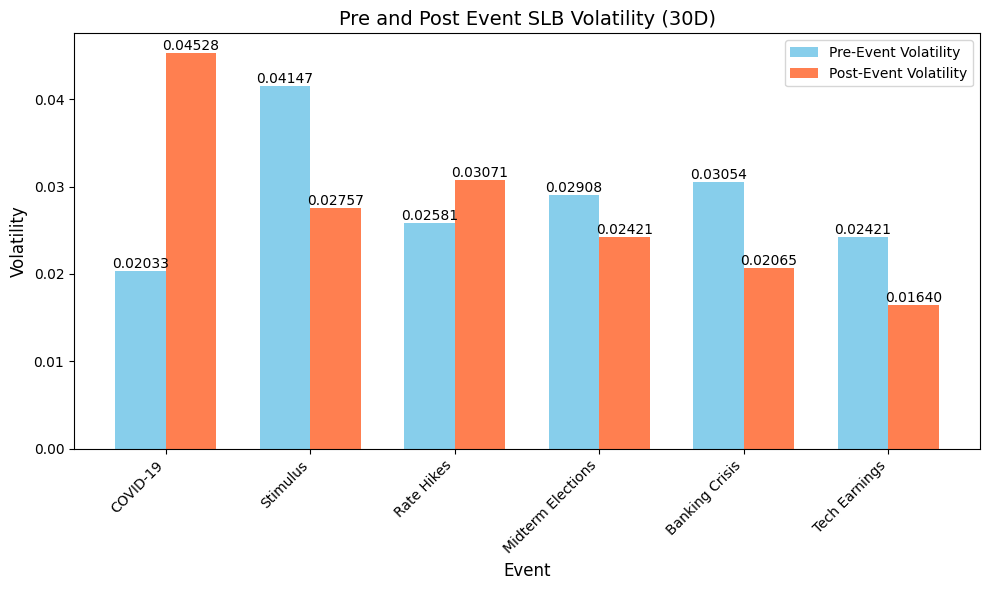

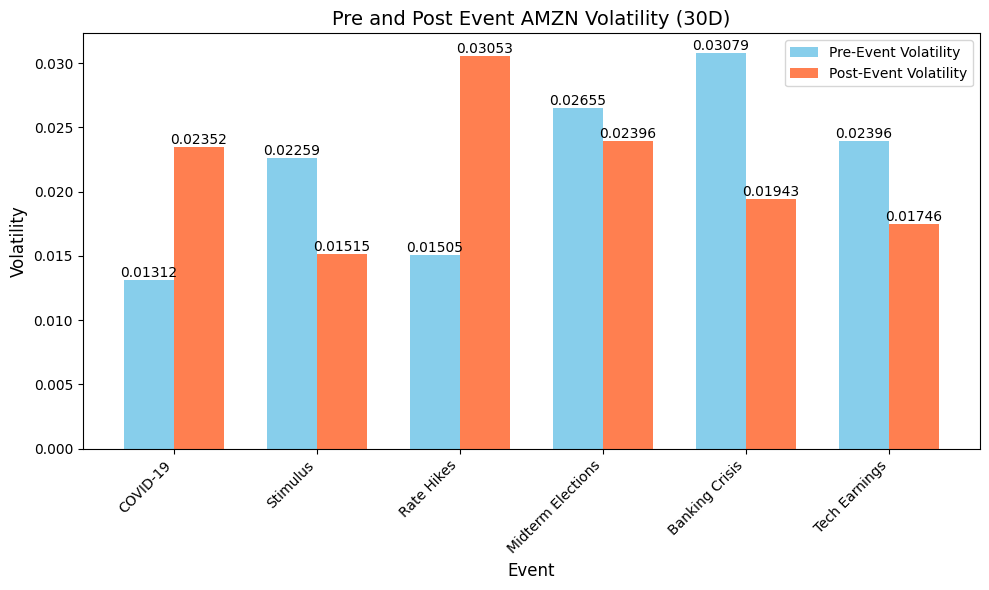

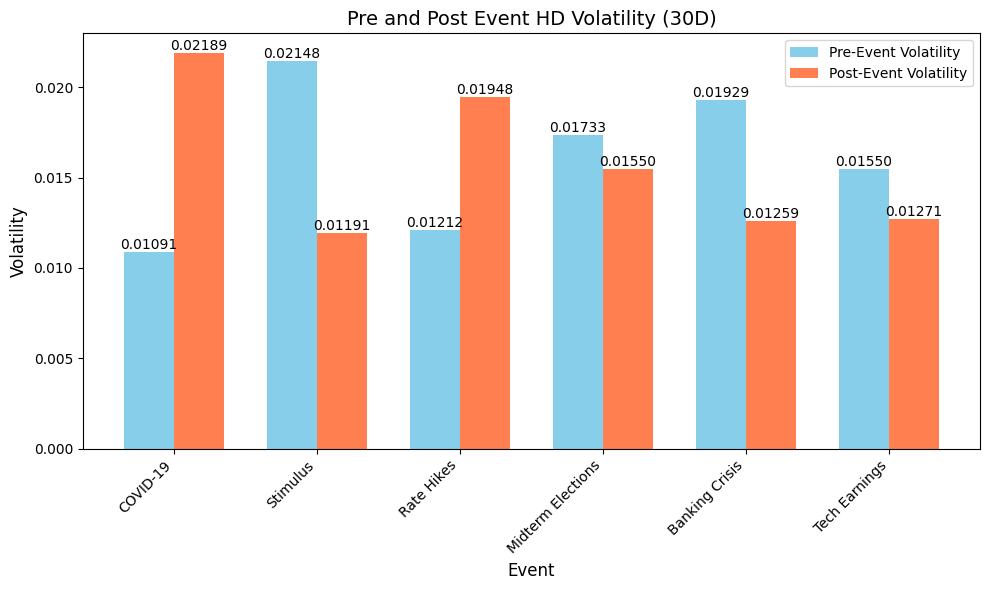

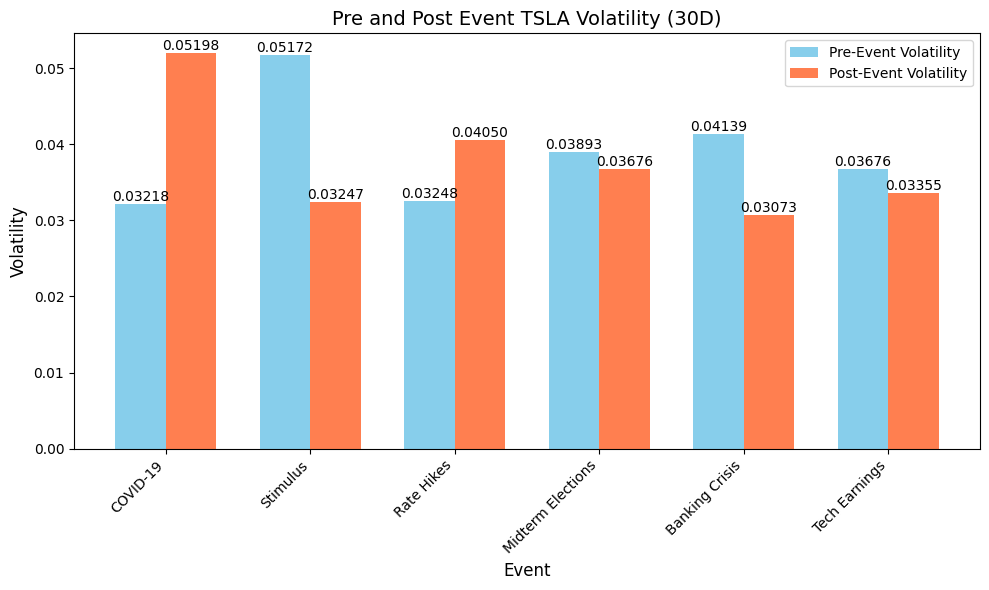

In [23]:
plot(30)

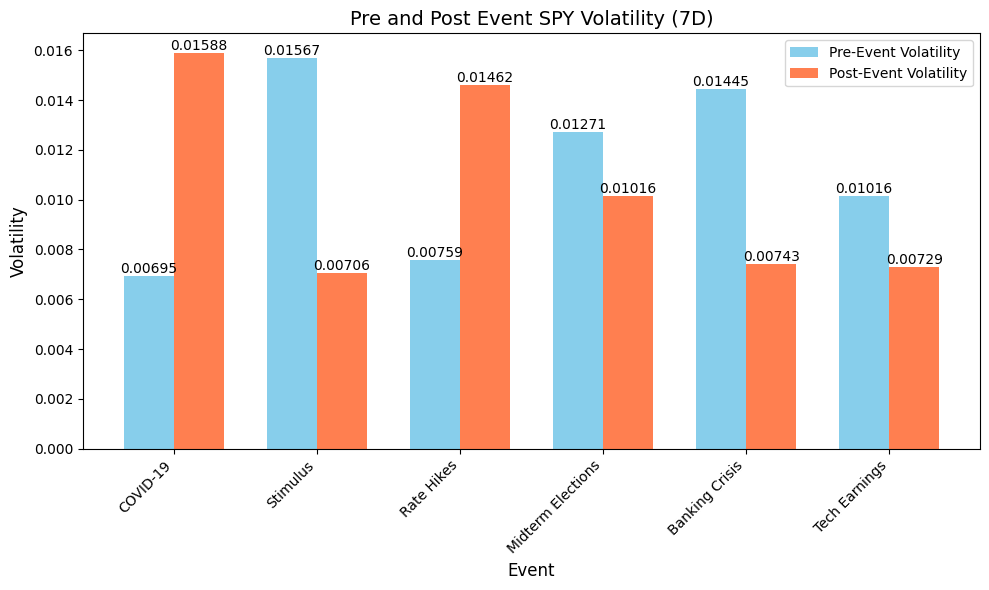

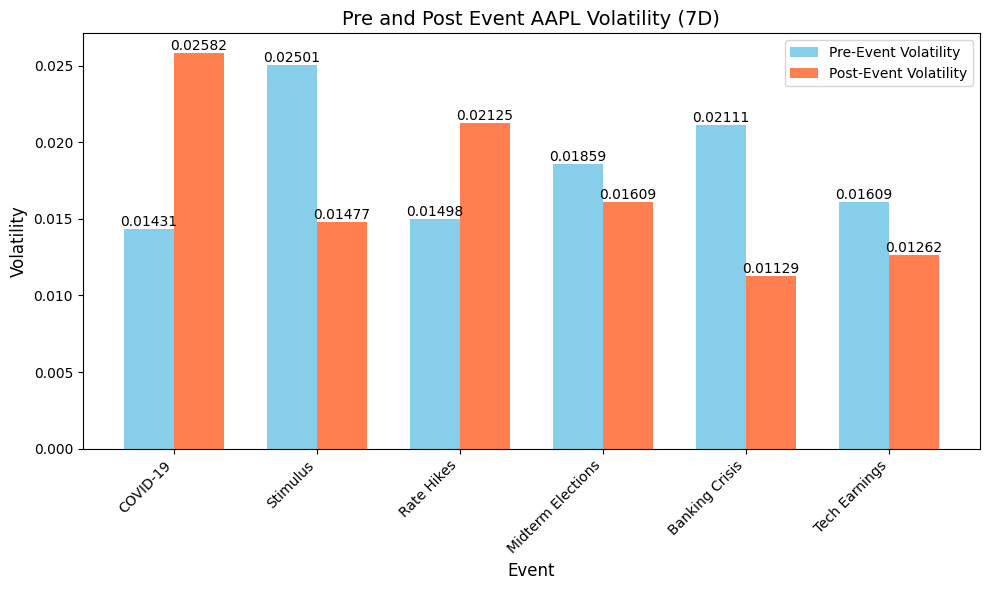

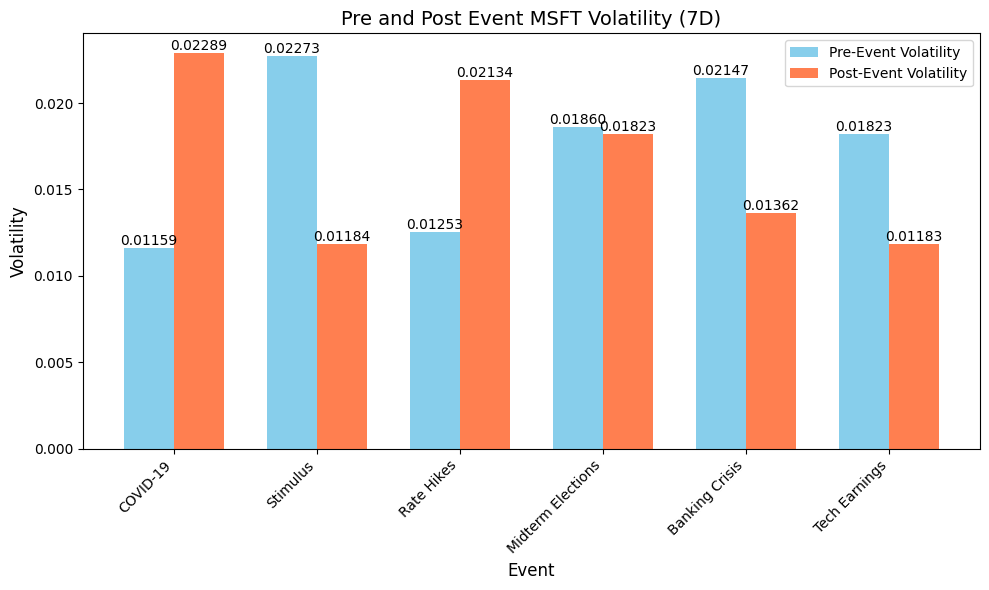

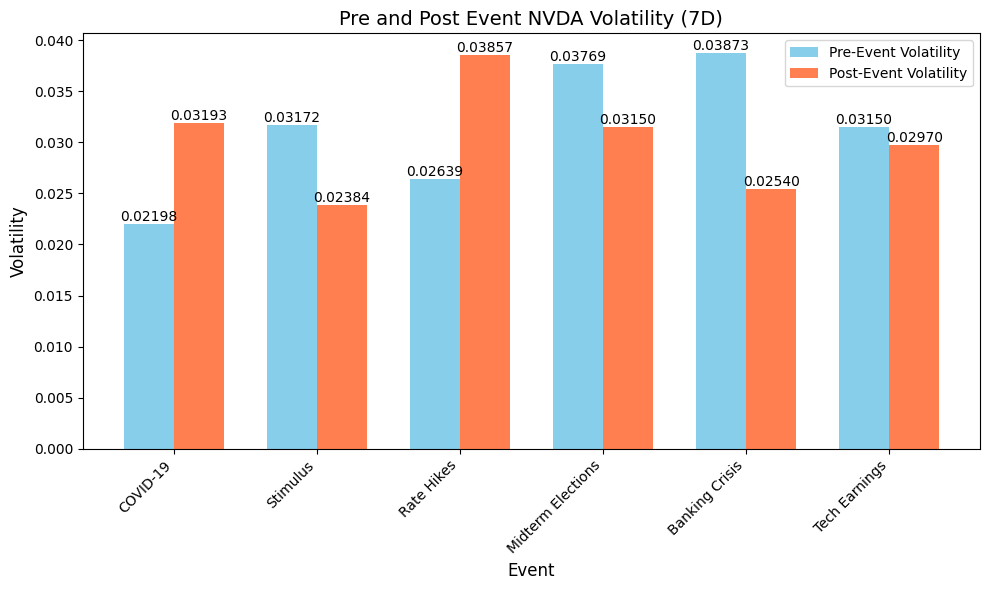

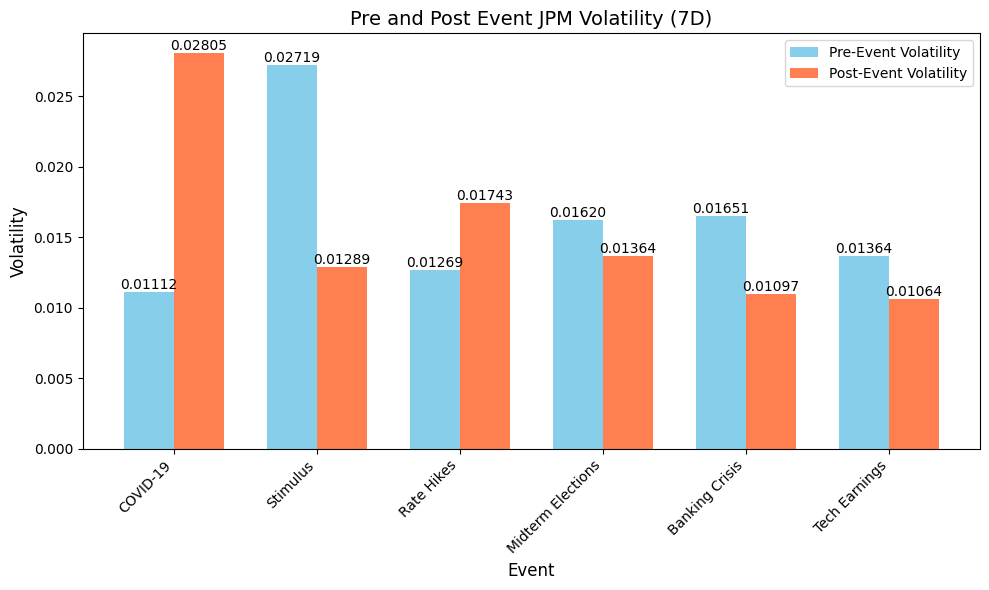

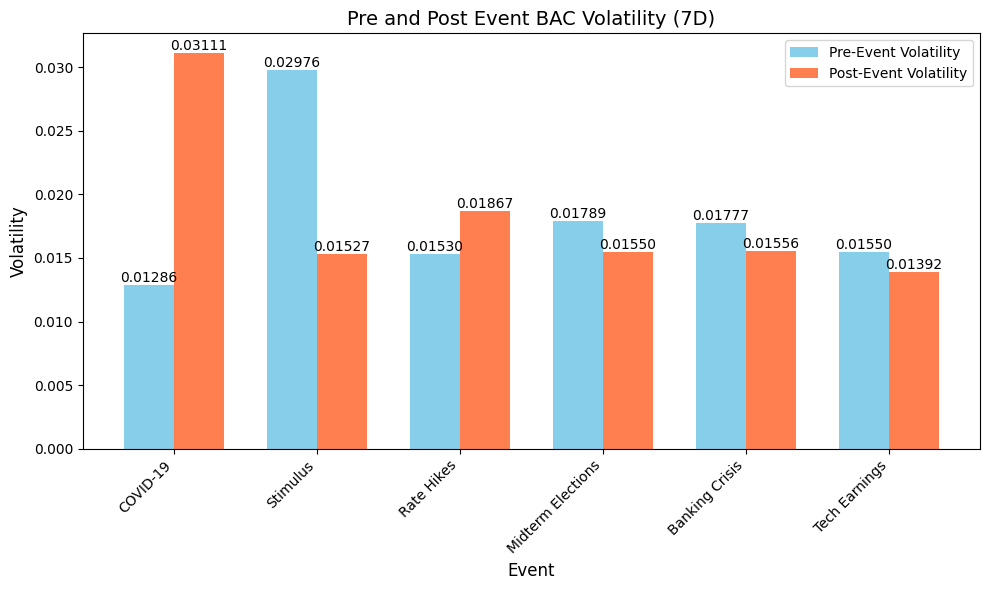

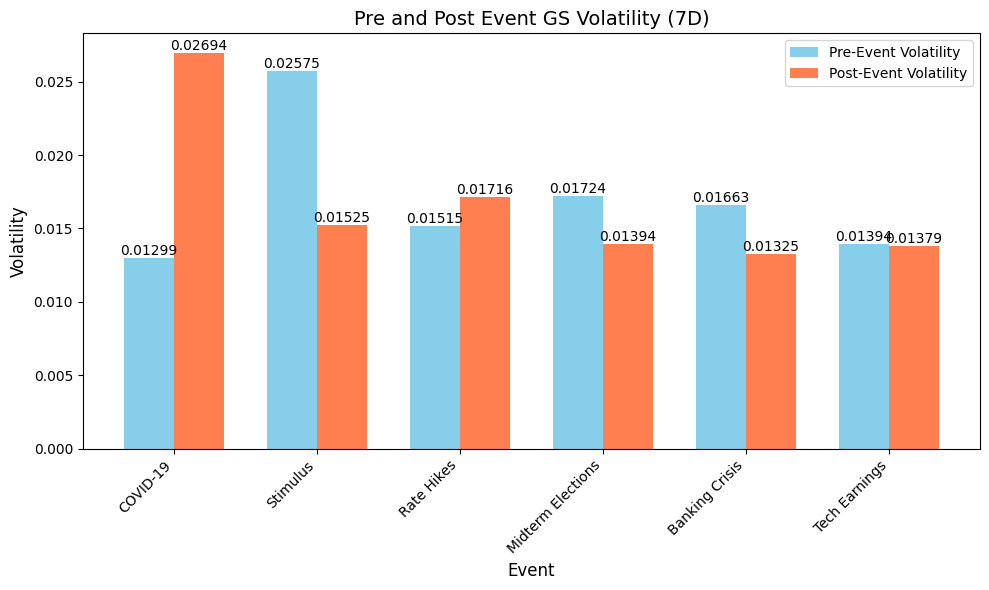

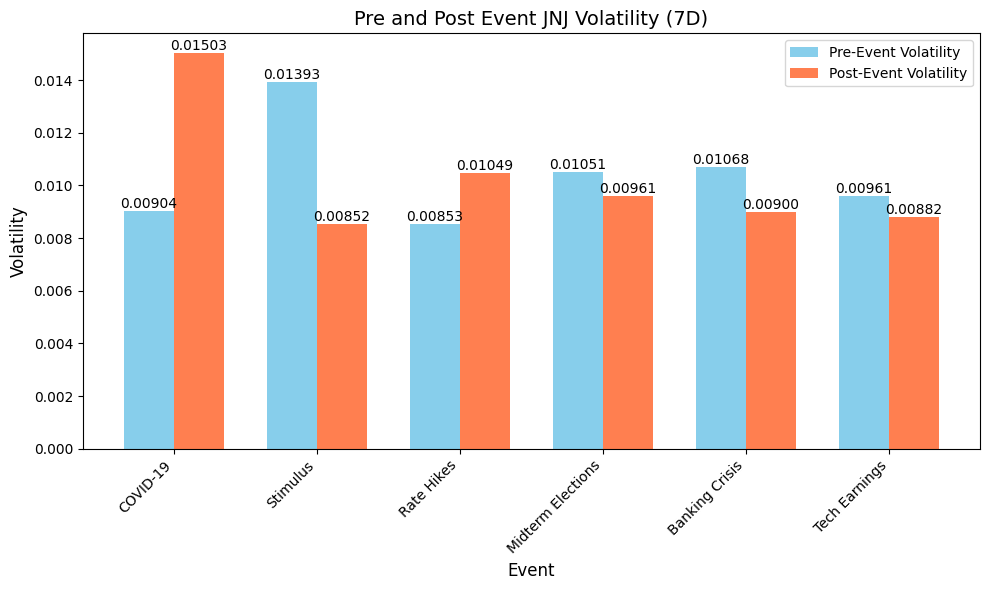

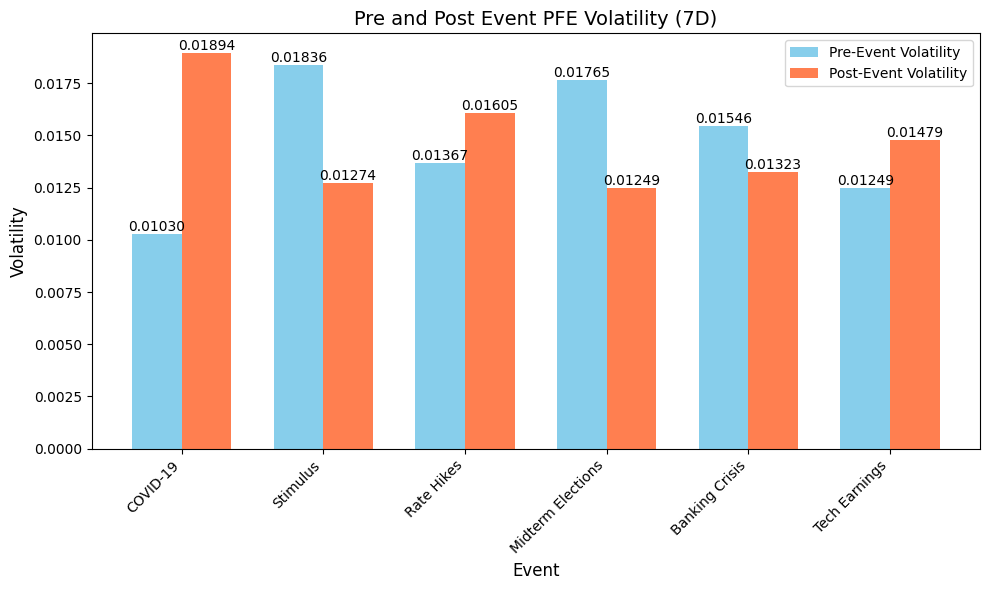

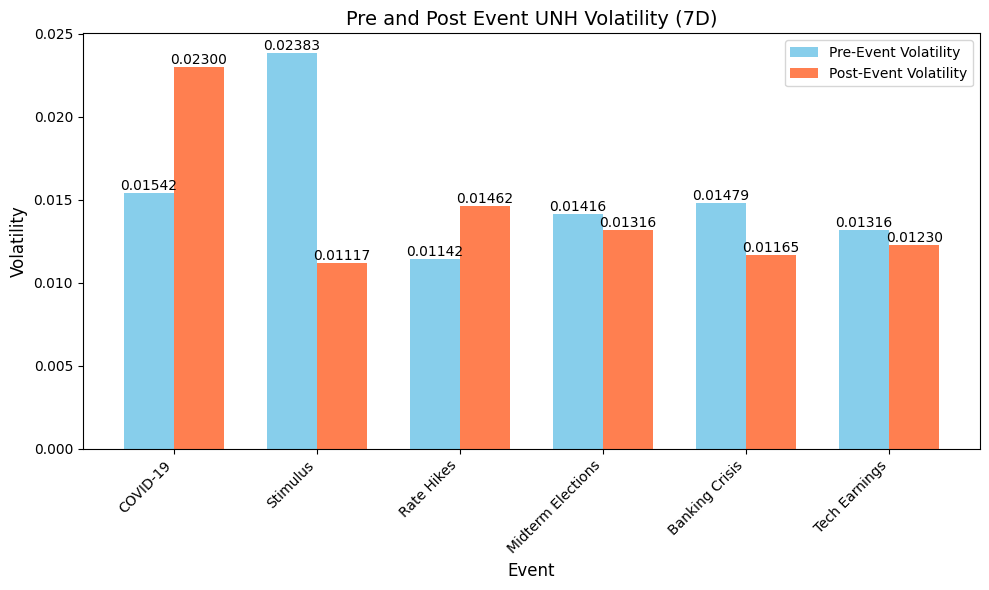

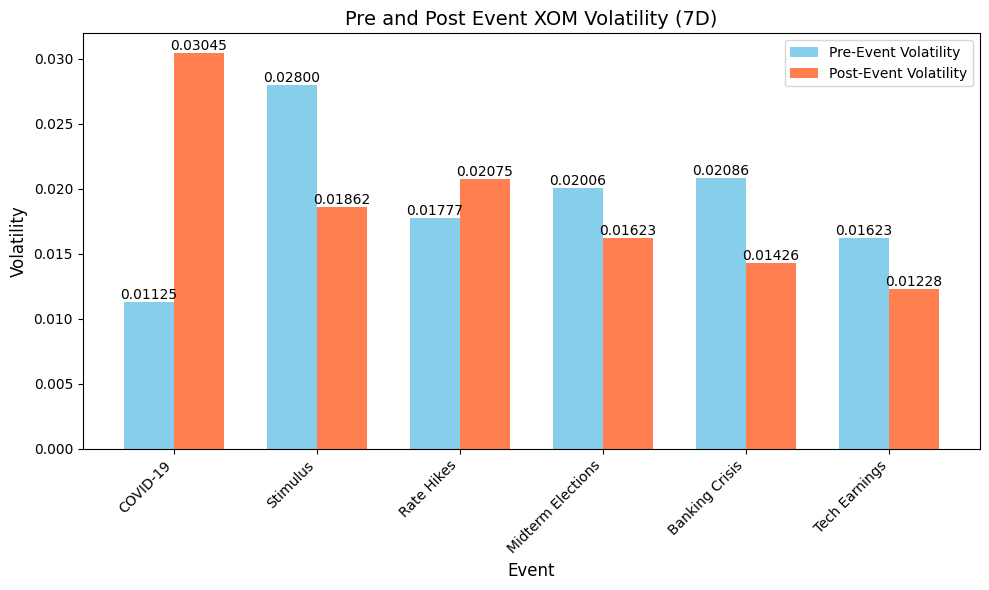

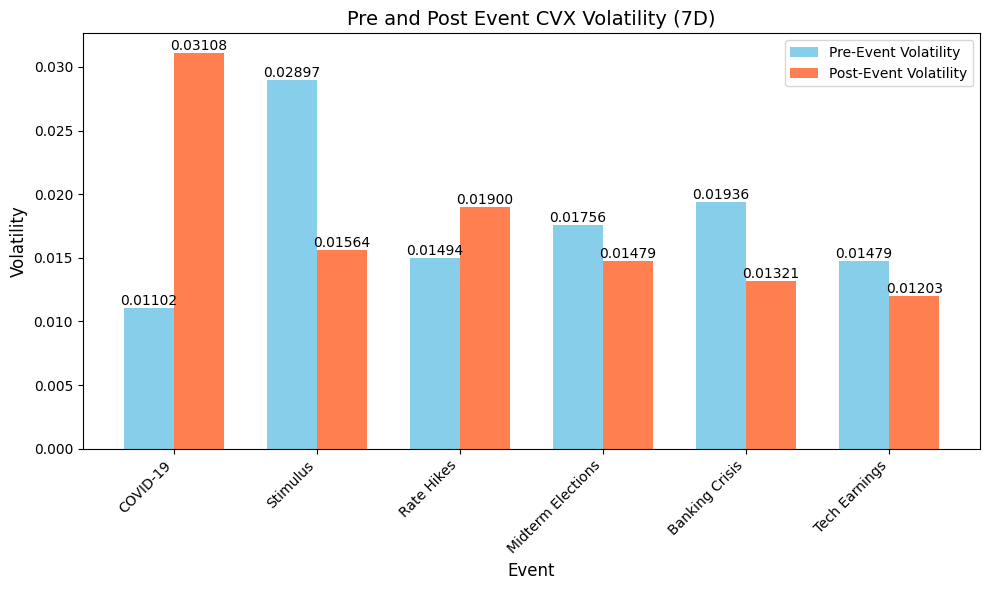

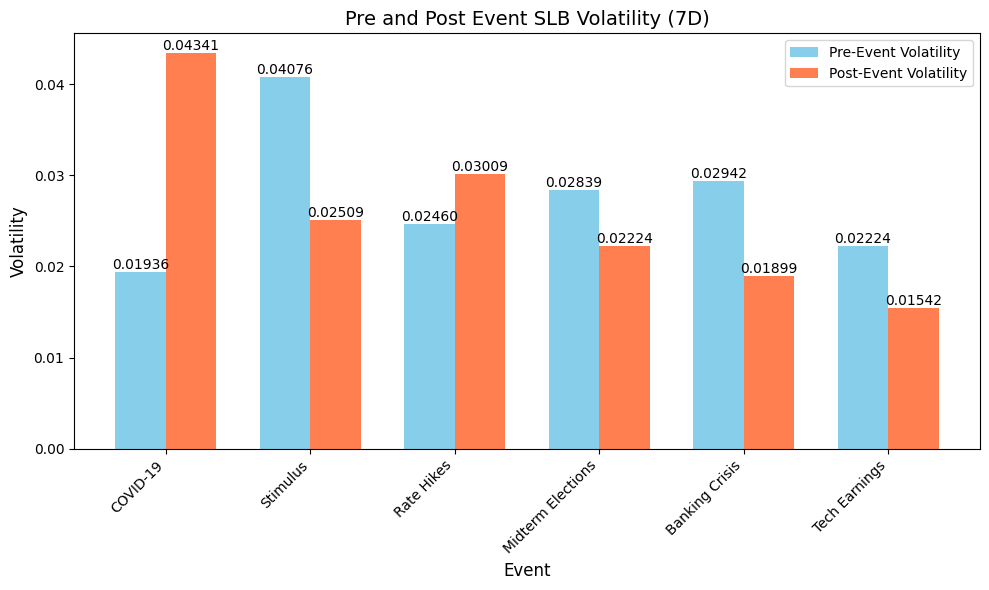

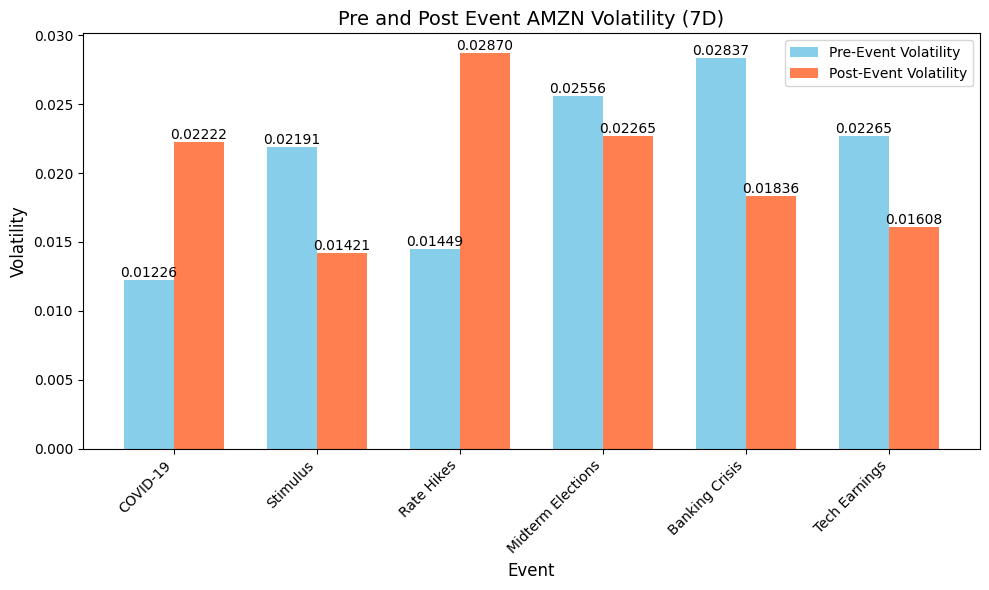

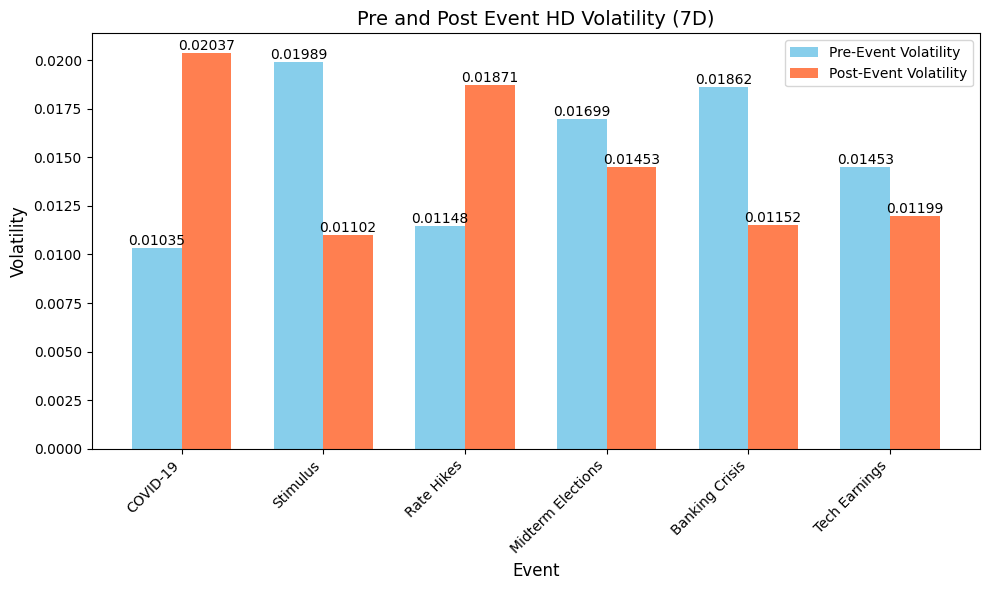

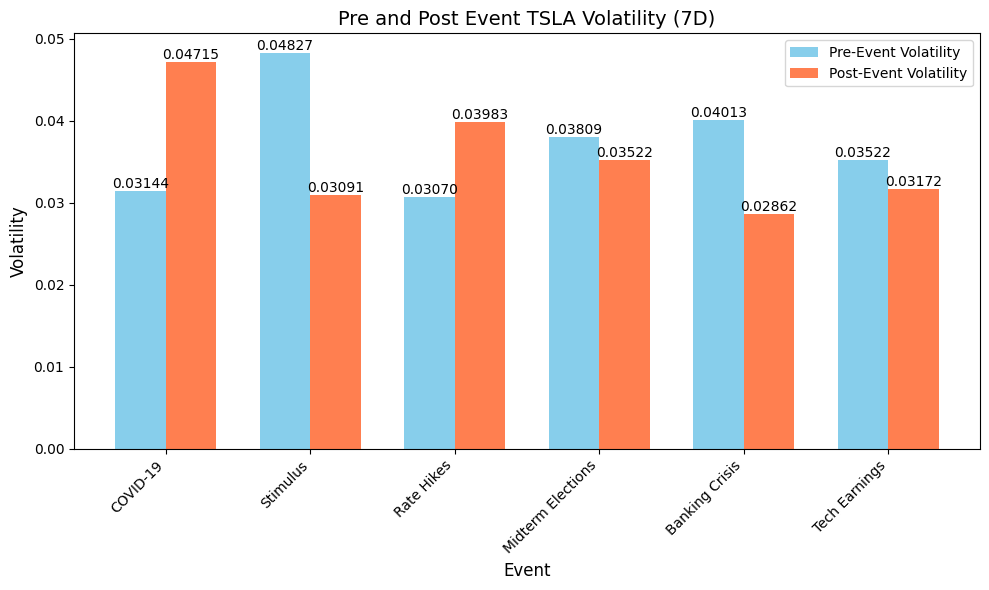

In [24]:
plot(7)

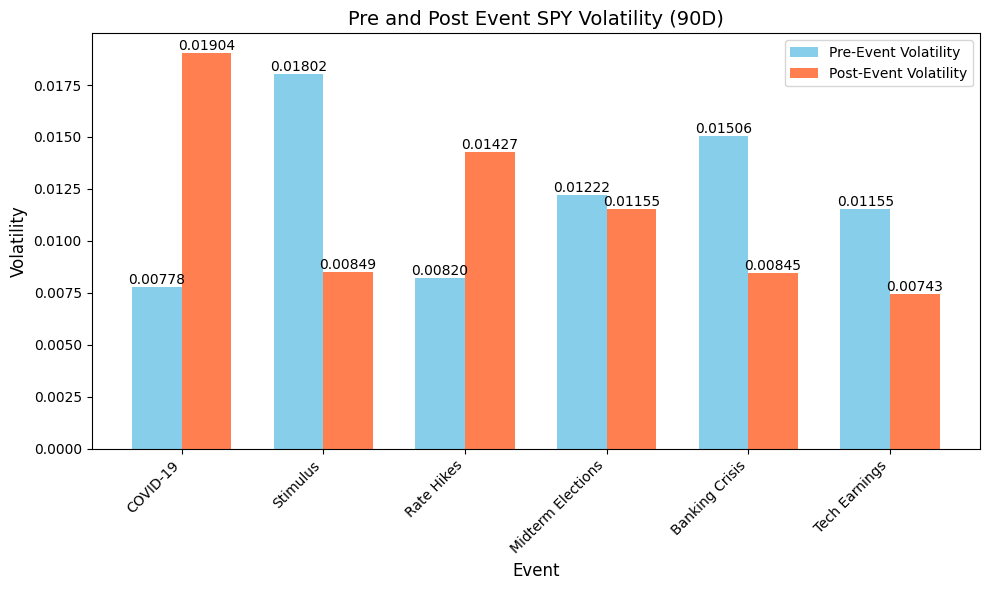

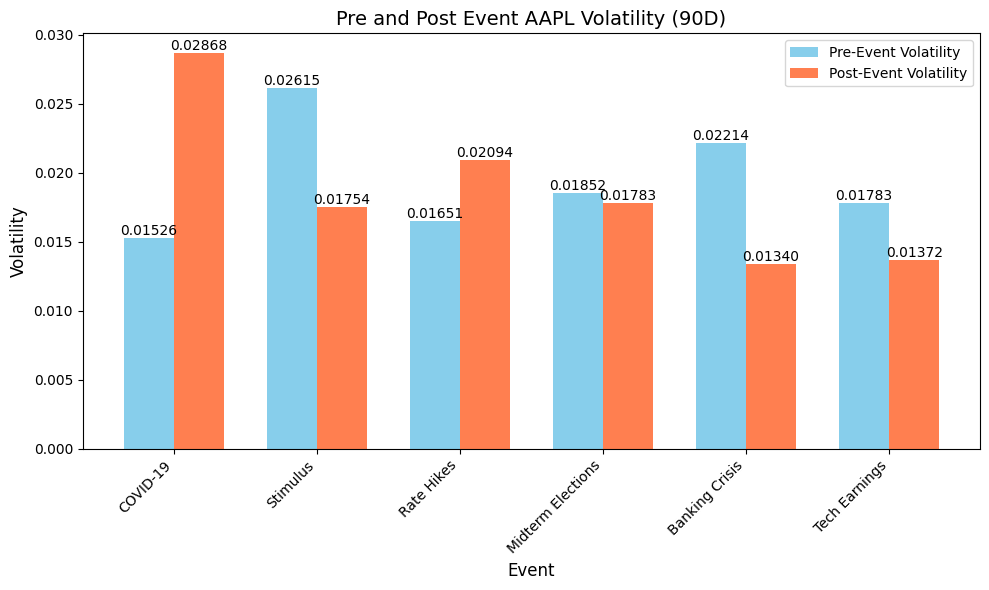

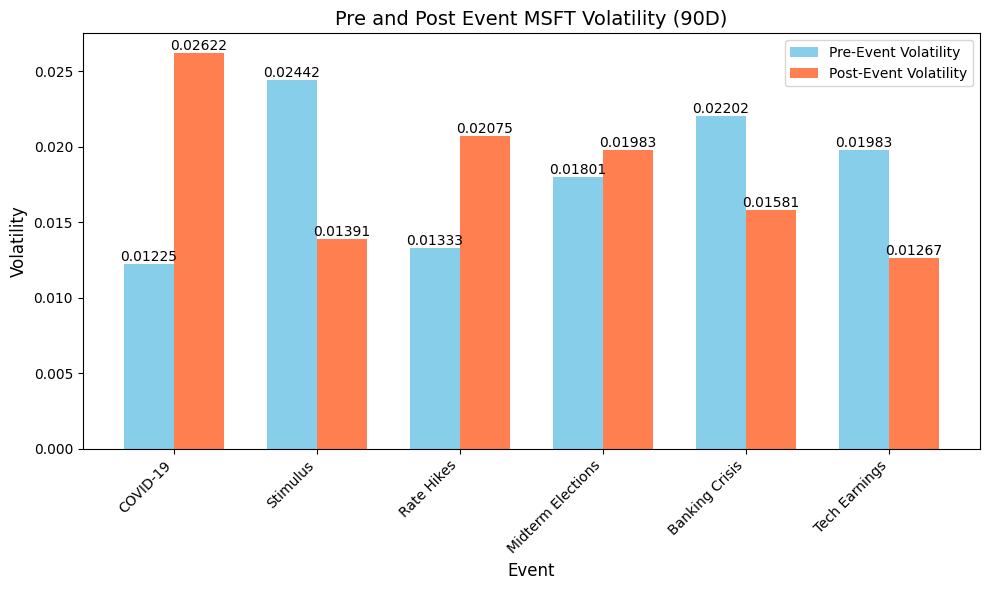

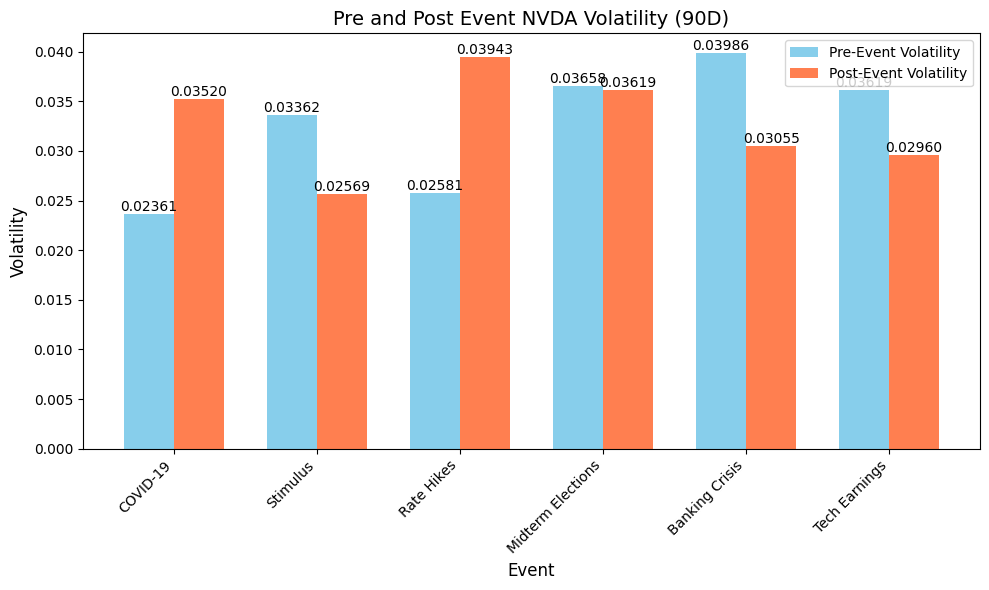

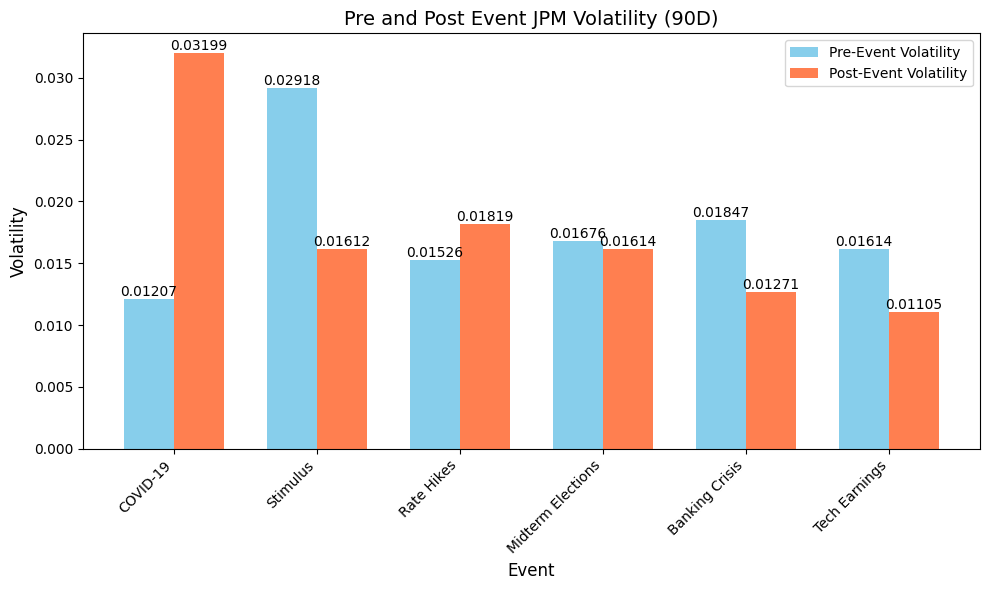

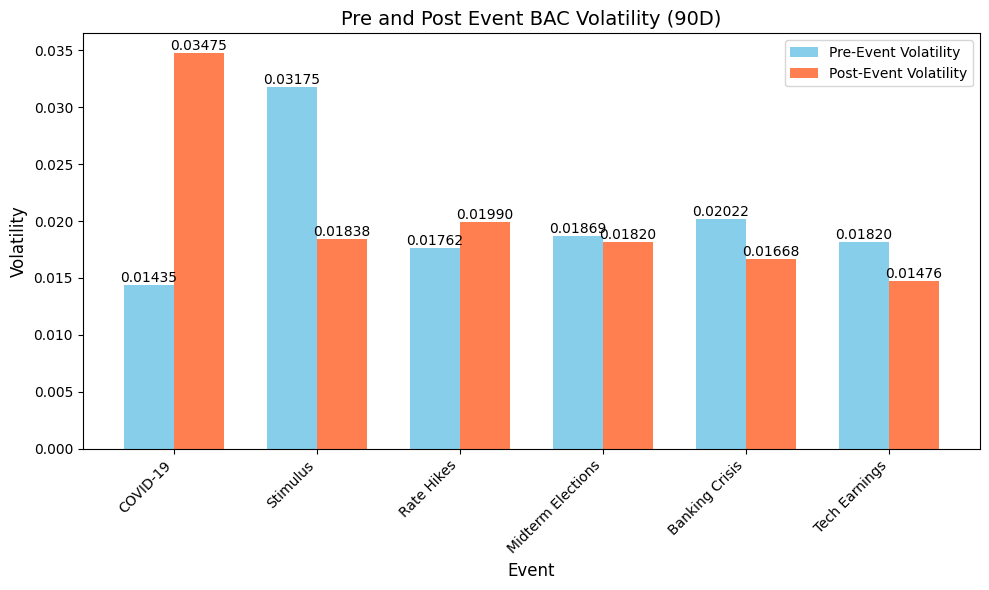

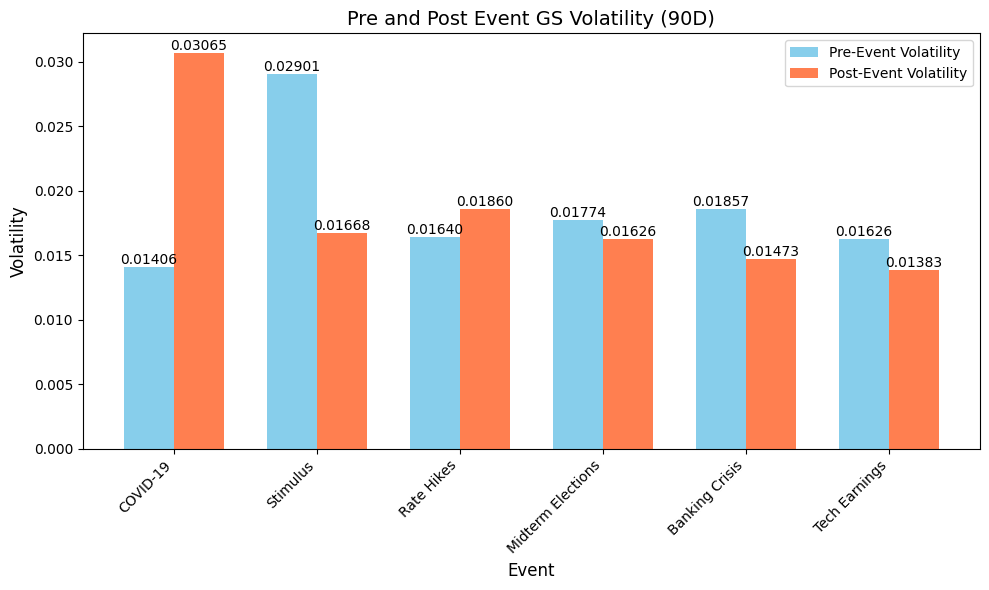

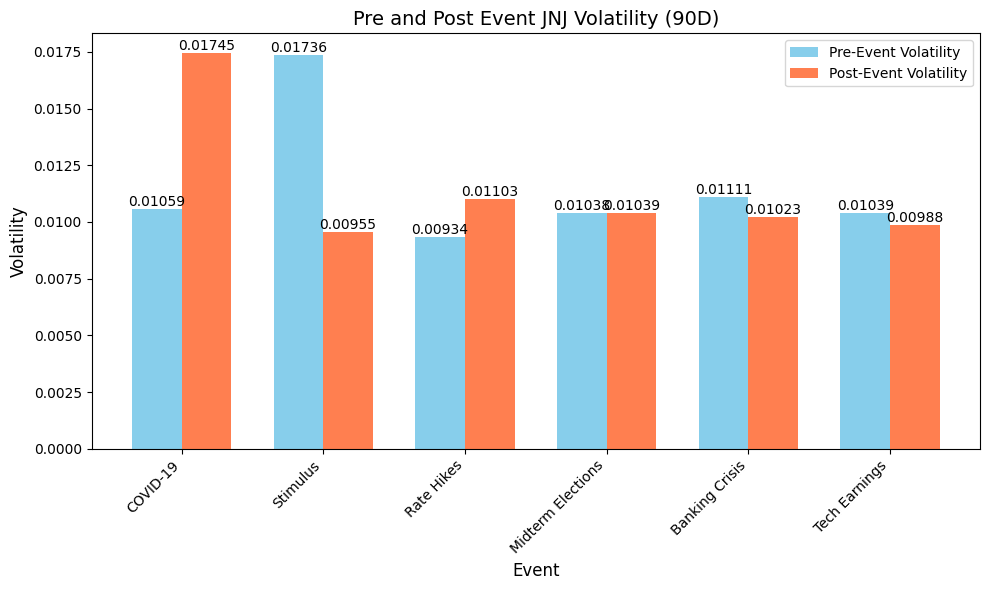

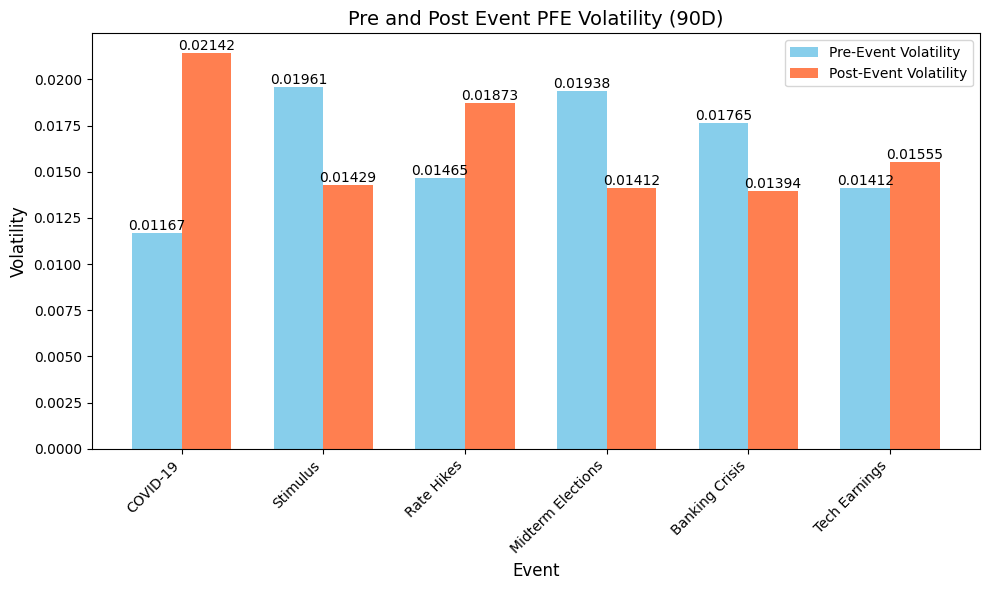

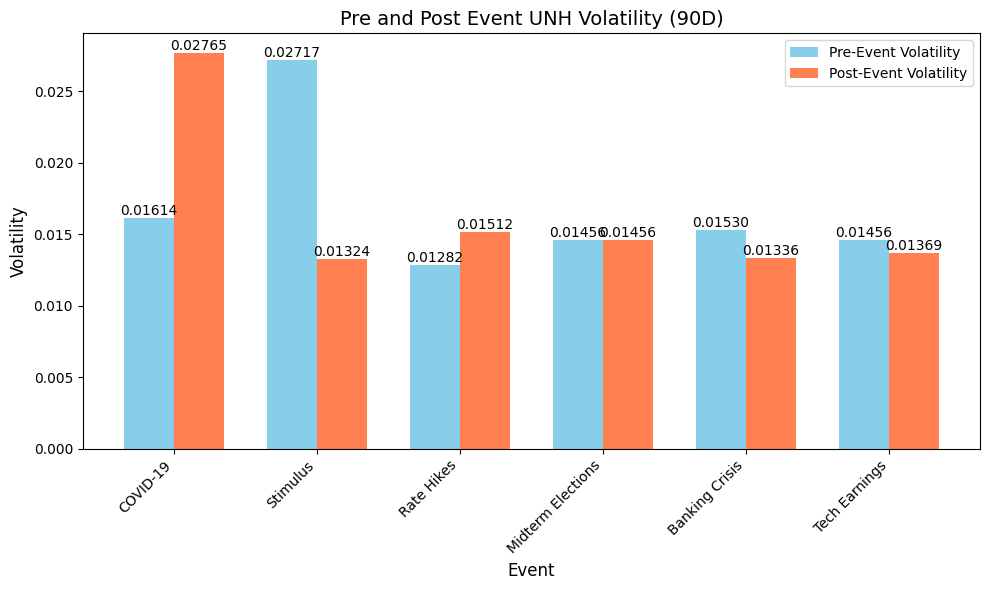

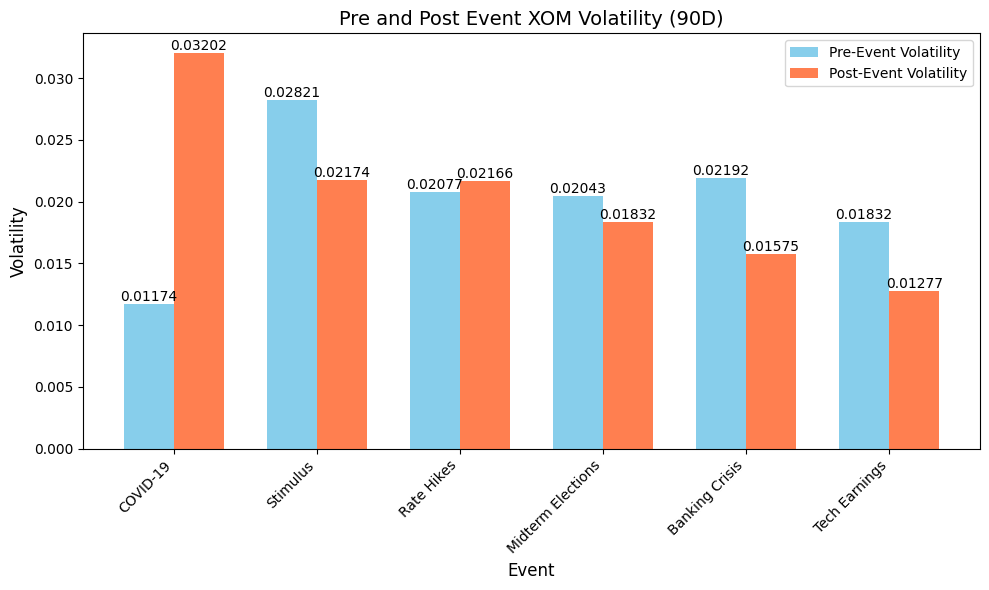

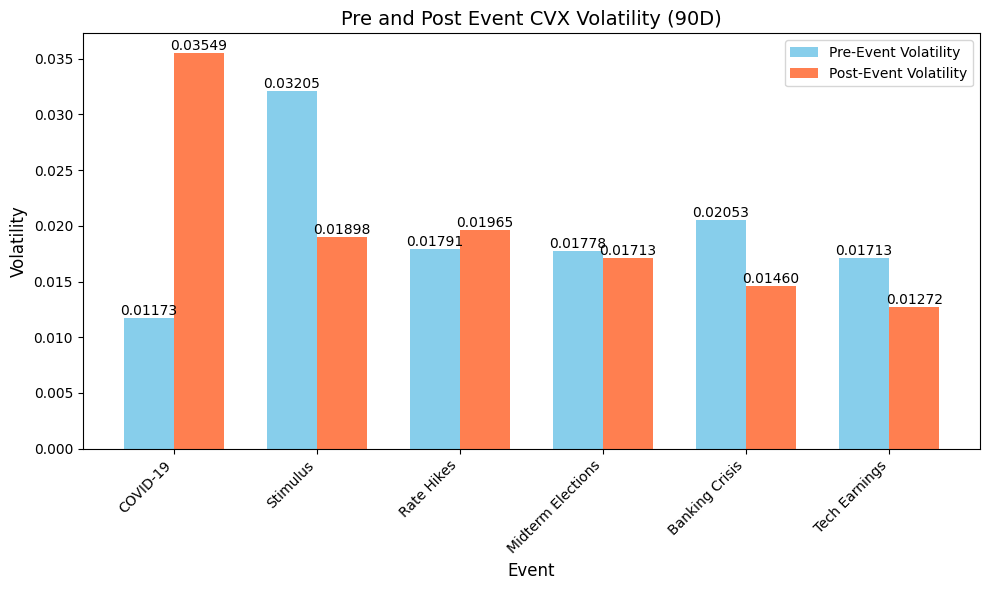

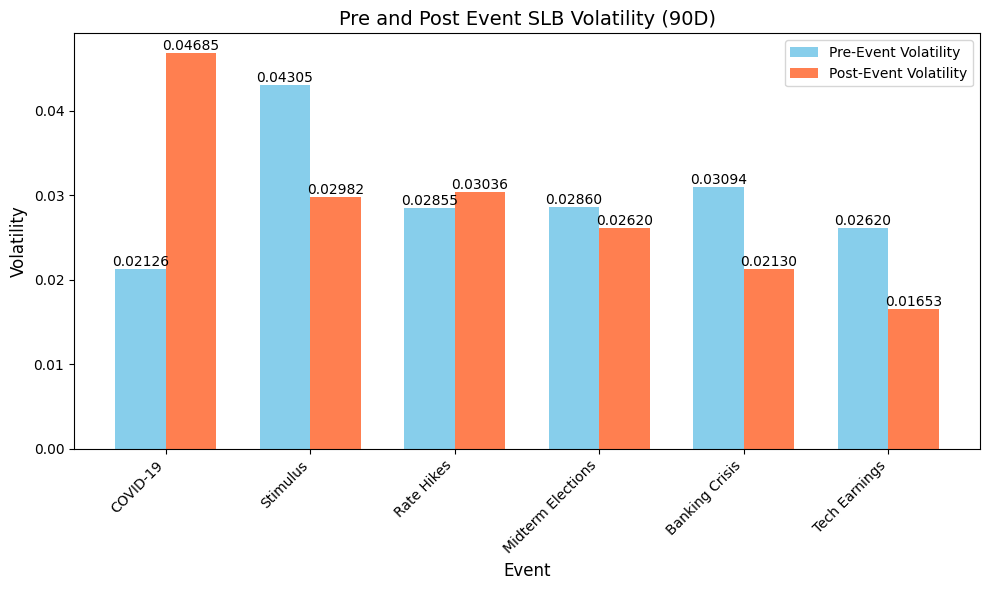

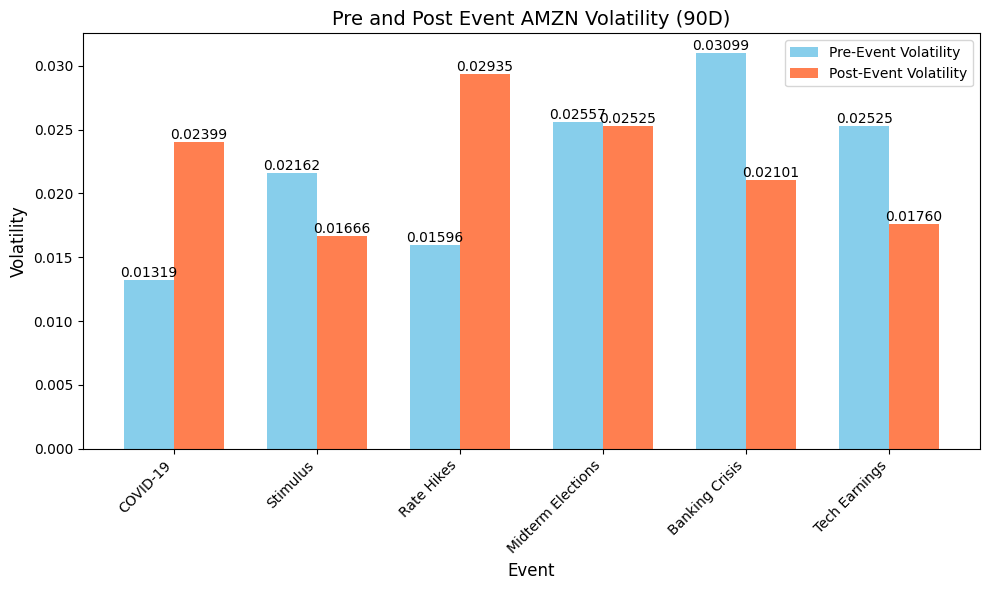

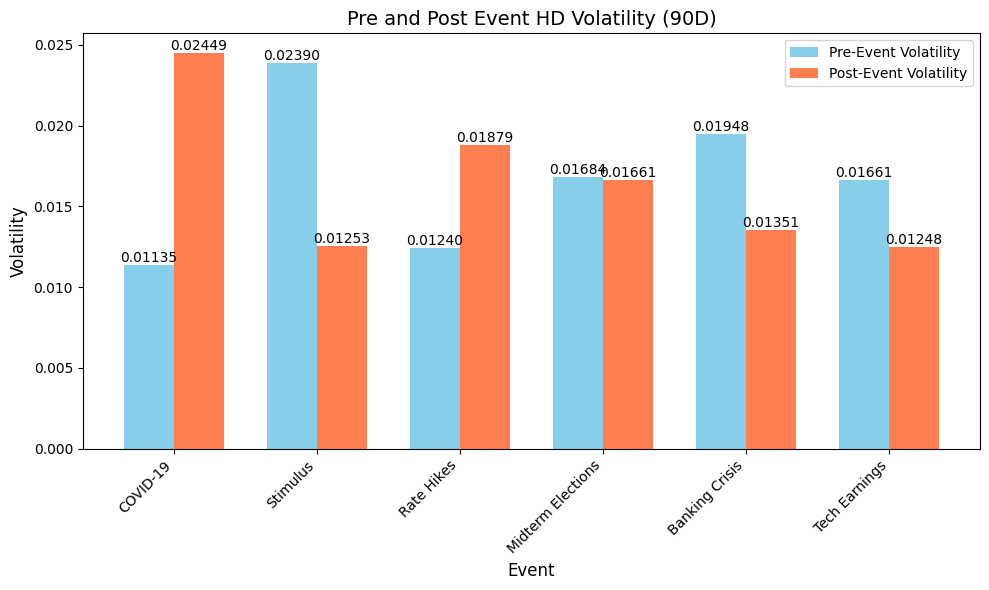

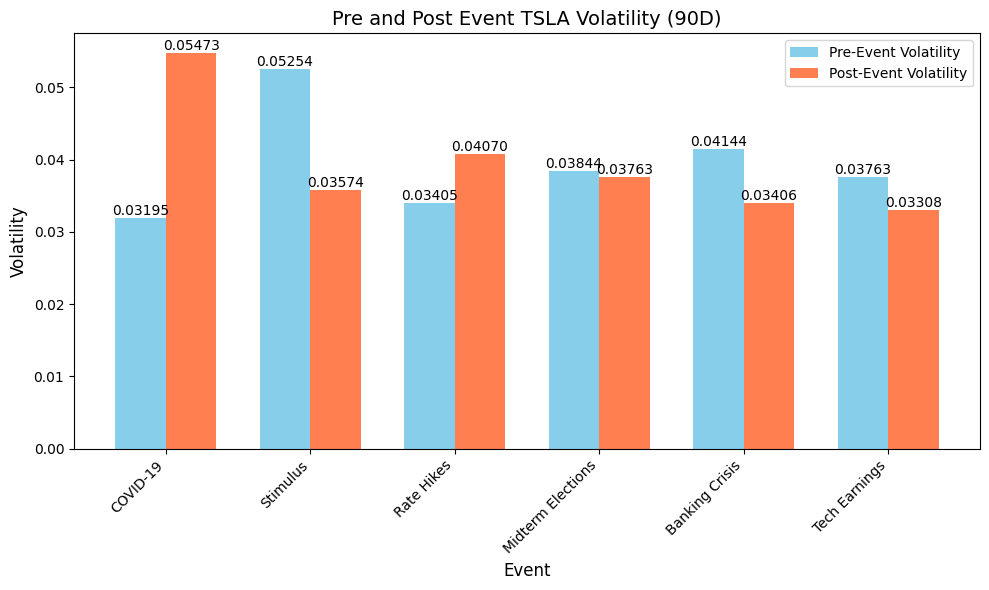

In [25]:
plot(90)

We will convert our results into a dataframe for better readability

In [27]:
def convert_to_df(window):
    """
    Function to transform our results into a dataframe
    """
    rows = []
    for stock, events in results[f"{window}"].items():
        for event, metrics in events.items():
            row = {
                "Stock": stock,
                "Event": event.capitalize(),
                "Pre-event Mean": metrics["pre_event"]["mean"],
                "Pre-event 95% CI": f"({metrics['pre_event']['CI_95'][0]:.5f}, {metrics['pre_event']['CI_95'][1]:.5f})",
                "Post-event Mean": metrics["post_event"]["mean"],
                "Post-event 95% CI": f"({metrics['post_event']['CI_95'][0]:.5f}, {metrics['post_event']['CI_95'][1]:.5f})",
                "T-statistic": metrics["t_stat"],
                "p-value": metrics["p_value"],
            }
            rows.append(row)
    return pd.DataFrame(rows)

In [28]:
results_df_30=convert_to_df(30)
results_df_30.head()

Stock              Event  Pre-event Mean    Pre-event 95% CI  \
0   SPY              Covid        0.007254  (0.00696, 0.00755)   
1   SPY           Stimulus        0.016484  (0.01487, 0.01810)   
2   SPY         Rate_hikes        0.007764  (0.00754, 0.00799)   
3   SPY  Midterm_elections        0.012934  (0.01246, 0.01341)   
4   SPY     Banking_crisis        0.014977  (0.01463, 0.01532)   

   Post-event Mean   Post-event 95% CI  T-statistic        p-value  
0         0.017155  (0.01560, 0.01871)   -12.313332   6.409207e-28  
1         0.007714  (0.00749, 0.00794)    10.607028   4.338106e-22  
2         0.015007  (0.01466, 0.01535)   -34.863808  2.828684e-127  
3         0.010613  (0.01013, 0.01110)     6.762911   3.788459e-11  
4         0.007736  (0.00755, 0.00792)    36.406446  5.370811e-126

In [29]:
results_df_7=convert_to_df(7)
results_df_7.head()

Stock              Event  Pre-event Mean    Pre-event 95% CI  \
0   SPY              Covid        0.006946  (0.00647, 0.00743)   
1   SPY           Stimulus        0.015672  (0.01384, 0.01751)   
2   SPY         Rate_hikes        0.007595  (0.00715, 0.00804)   
3   SPY  Midterm_elections        0.012709  (0.01207, 0.01335)   
4   SPY     Banking_crisis        0.014449  (0.01387, 0.01503)   

   Post-event Mean   Post-event 95% CI  T-statistic       p-value  
0         0.015885  (0.01406, 0.01771)    -9.328307  3.164732e-18  
1         0.007060  (0.00665, 0.00747)     9.023620  3.205615e-17  
2         0.014615  (0.01403, 0.01520)   -18.761312  6.450344e-59  
3         0.010159  (0.00958, 0.01074)     5.823580  1.037713e-08  
4         0.007432  (0.00714, 0.00772)    21.169920  1.205359e-65

In [30]:
results_df_90=convert_to_df(90)
results_df_90.head()

Stock              Event  Pre-event Mean    Pre-event 95% CI  \
0   SPY              Covid        0.007779  (0.00760, 0.00796)   
1   SPY           Stimulus        0.018016  (0.01676, 0.01928)   
2   SPY         Rate_hikes        0.008196  (0.00803, 0.00837)   
3   SPY  Midterm_elections        0.012216  (0.01175, 0.01268)   
4   SPY     Banking_crisis        0.015055  (0.01487, 0.01524)   

   Post-event Mean   Post-event 95% CI  T-statistic        p-value  
0         0.019036  (0.01790, 0.02017)   -19.288289   3.408466e-52  
1         0.008491  (0.00829, 0.00870)    14.704750   3.581989e-36  
2         0.014275  (0.01397, 0.01458)   -33.892937  2.473528e-118  
3         0.011545  (0.01113, 0.01196)     2.122359   3.430543e-02  
4         0.008447  (0.00825, 0.00865)    47.820844  4.700879e-188

We will add a column called "Reject Null Hypothesis". It'll be yes for a record if the p-value is less than 0.05, and no otherwise.

In [32]:
results_df_30["Reject Null Hypothesis?"]=results_df_30["p-value"].apply(lambda x: "Yes" if x<0.05 else "No")
results_df_7["Reject Null Hypothesis?"]=results_df_7["p-value"].apply(lambda x: "Yes" if x<0.05 else "No")
results_df_90["Reject Null Hypothesis?"]=results_df_90["p-value"].apply(lambda x: "Yes" if x<0.05 else "No")

We will separate the results for each event

In [34]:
events=list(results_df_30["Event"].unique())

In [35]:
result_dfs_30=[]
result_dfs_7=[]
result_dfs_90=[]
for event in events:
    result_dfs_30.append(results_df_30[results_df_30["Event"]==event].drop("Event",axis=1))
    result_dfs_7.append(results_df_7[results_df_7["Event"]==event].drop("Event",axis=1))
    result_dfs_90.append(results_df_90[results_df_90["Event"]==event].drop("Event",axis=1))

We can see what results for each event looks like below (for a 30 day rolling period)-> 

In [37]:
result_dfs_30[0]

Stock  Pre-event Mean    Pre-event 95% CI  Post-event Mean  \
0    SPY        0.007254  (0.00696, 0.00755)         0.017155   
6   AAPL        0.014608  (0.01417, 0.01504)         0.027358   
12  MSFT        0.011787  (0.01140, 0.01217)         0.024487   
18  NVDA        0.022683  (0.02205, 0.02332)         0.033505   
24   JPM        0.011691  (0.01139, 0.01199)         0.030163   
30   BAC        0.013594  (0.01319, 0.01400)         0.033048   
36    GS        0.013485  (0.01320, 0.01377)         0.028982   
42   JNJ        0.009533  (0.00913, 0.00993)         0.016105   
48   PFE        0.011197  (0.01083, 0.01156)         0.020394   
54   UNH        0.016052  (0.01562, 0.01648)         0.025030   
60   XOM        0.011521  (0.01123, 0.01181)         0.031588   
66   CVX        0.011406  (0.01113, 0.01168)         0.033057   
72   SLB        0.020333  (0.01984, 0.02083)         0.045282   
78  AMZN        0.013122  (0.01272, 0.01352)         0.023518   
84    HD        0.010906  (0.01062, 0.01119)         0.021889   
90  TSLA        0.032181  (0.03090, 0.03347)         0.051978   

     Post-event 95% CI  T-statistic       p-value Reject Null Hypothesis?  
0   (0.01560, 0.01871)   -12.313332  6.409207e-28                     Yes  
6   (0.02587, 0.02884)   -16.229593  1.083496e-42                     Yes  
12  (0.02278, 0.02620)   -14.281995  5.364178e-35                     Yes  
18  (0.03149, 0.03552)   -10.106773  7.541171e-21                     Yes  
24  (0.02802, 0.03230)   -16.825810  1.757010e-43                     Yes  
30  (0.03083, 0.03527)   -16.983609  2.415829e-44                     Yes  
36  (0.02692, 0.03105)   -14.631053  9.201952e-36                     Yes  
42  (0.01474, 0.01747)    -9.108745  1.353555e-17                     Yes  
48  (0.01923, 0.02156)   -14.863070  8.615765e-38                     Yes  
54  (0.02288, 0.02718)    -8.080812  2.159907e-14                     Yes  
60  (0.03010, 0.03307)   -26.076931  1.170085e-75                     Yes  
66  (0.03049, 0.03563)   -16.501961  3.792980e-42                     Yes  
72  (0.04286, 0.04771)   -19.864843  8.591526e-55                     Yes  
78  (0.02268, 0.02436)   -22.049889  1.073091e-68                     Yes  
84  (0.01975, 0.02403)   -10.032121  3.200863e-20                     Yes  
90  (0.04983, 0.05413)   -15.564749  3.202032e-43                     Yes

We will save our event wise results

In [39]:
for i in range(len(events)):
    result_dfs_30[i].to_excel(f"Results/{events[i]}_results_30_day.xlsx",index=False)
    result_dfs_7[i].to_excel(f"Results/{events[i]}_results_7_day.xlsx",index=False)
    result_dfs_90[i].to_excel(f"Results/{events[i]}_results_90_day.xlsx",index=False)

Tech stocks are considered to be very volatile while finance stocks are considered to be stable.

We will do a t-test again to test this hypothesis.

Here the Hypotheses is given by: <br>
$H_0: \mu_{tech} = \mu_{fin}$ (i.e. the mean volatilites of both the sectors are same) <br>
$H_1: \mu_{tech} > \mu_{fin}$ (i.e. the mean volatilites of tech is greater than that of finance)

We will perform a one tailed t-test.

In [41]:
df_tech=df[df["Stock"].isin("AAPL MSFT NVDA".split())]
df_fin=df[df["Stock"].isin("JPM BAC GS".split())]

In [42]:
tech_vol_30D = df_tech["Rolling Volatility 30D"].dropna()
fin_vol_30D = df_fin["Rolling Volatility 30D"].dropna()

# Perform Welch's t-test
t_stat, p_value_two_tailed = stats.ttest_ind(tech_vol_30D, fin_vol_30D, equal_var=False)

# Convert to one-tailed p-value
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)

print("One-Tailed Welch's t-test results (Tech > Finance):")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value_one_tailed}")

alpha = 0.05
if p_value_one_tailed < alpha:
    print("The volatility of technology stocks is significantly greater than that of finance stocks.")
else:
    print("No significant evidence that technology stocks are more volatile than finance stocks.")

One-Tailed Welch's t-test results (Tech > Finance):
t-statistic: 18.171856576285766
p-value: 9.934706734104174e-73
The volatility of technology stocks is significantly greater than that of finance stocks.


The test confirms that the mean volatility of tech sector is higher than that of finance sector. <br>
We can take a look at rolling volatilities of each of the stocks in the two sectors.

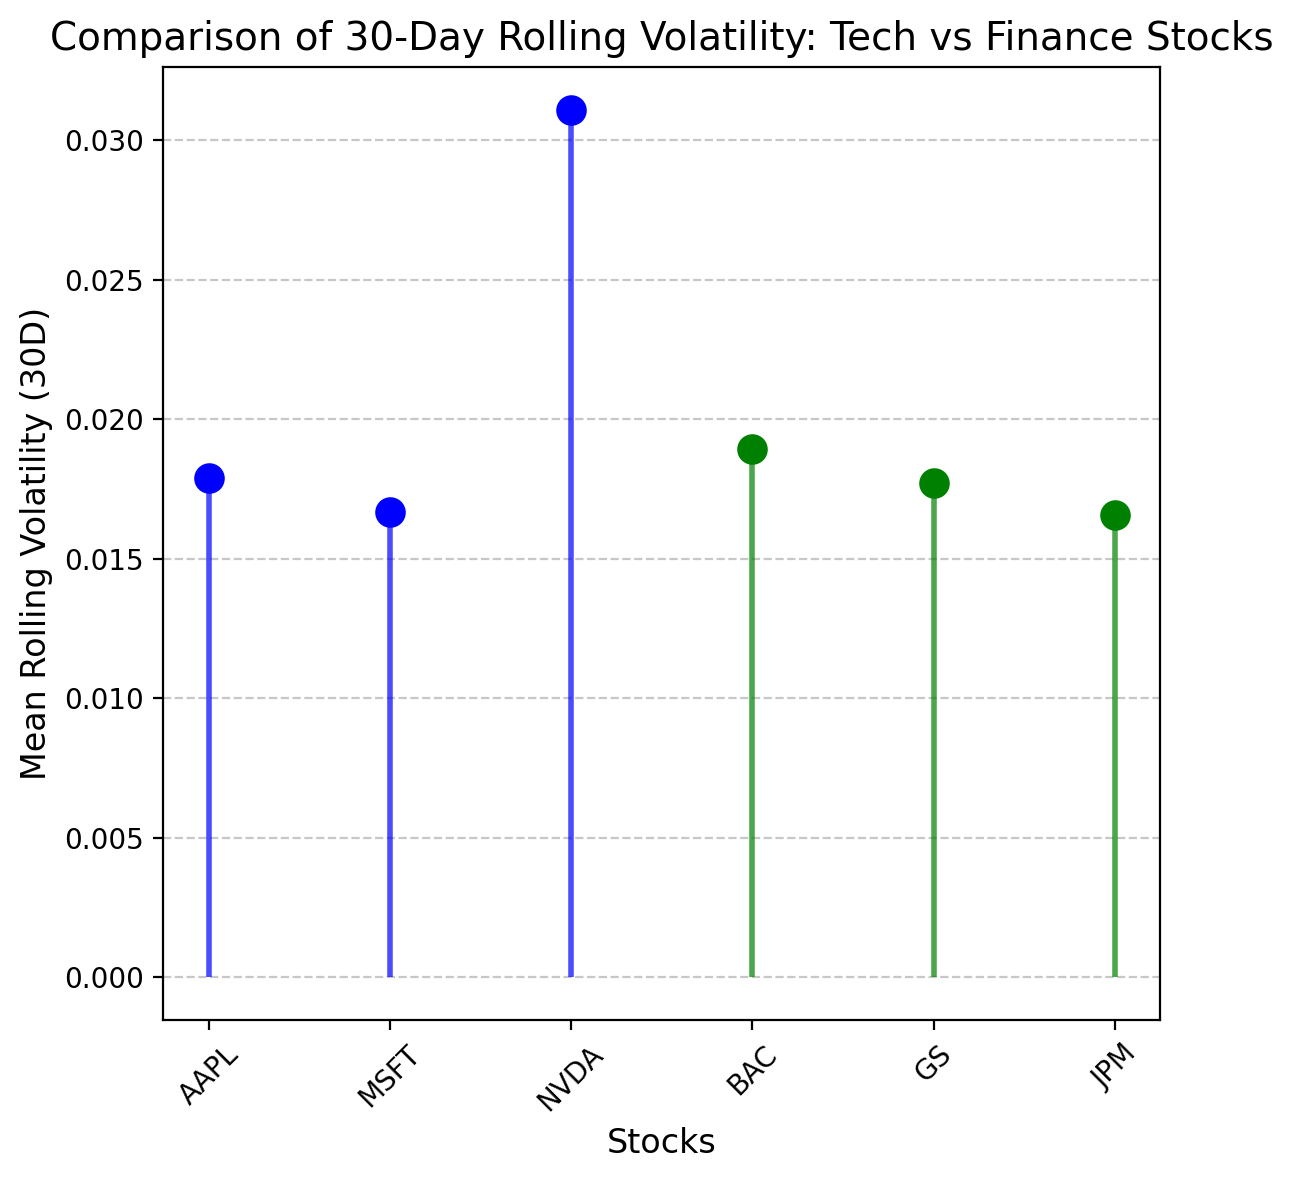

In [44]:
mean_tech_vol = df_tech.groupby("Stock")["Rolling Volatility 30D"].mean()
mean_fin_vol = df_fin.groupby("Stock")["Rolling Volatility 30D"].mean()

stocks_tech = mean_tech_vol.index
stocks_fin = mean_fin_vol.index
volatilities_tech = mean_tech_vol.values
volatilities_fin = mean_fin_vol.values

fig, ax = plt.subplots(figsize=(6,6), dpi=200)

ax.vlines(x=stocks_tech, ymin=0, ymax=volatilities_tech, color='blue', alpha=0.7, linewidth=2, label="Tech Stocks")
ax.scatter(x=stocks_tech, y=volatilities_tech, color='blue', s=100, label="Tech Volatility")

ax.vlines(x=stocks_fin, ymin=0, ymax=volatilities_fin, color='green', alpha=0.7, linewidth=2, label="Finance Stocks")
ax.scatter(x=stocks_fin, y=volatilities_fin, color='green', s=100, label="Finance Volatility")

ax.set_title("Comparison of 30-Day Rolling Volatility: Tech vs Finance Stocks", fontsize=14)
ax.set_ylabel("Mean Rolling Volatility (30D)", fontsize=12)
ax.set_xlabel("Stocks", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=np.arange(len(stocks_tech) + len(stocks_fin)), labels=list(stocks_tech) + list(stocks_fin), rotation=45)

plt.tight_layout()
plt.savefig("Graphs/Tech vs finance rolling volatilities.jpg",dpi=200)
plt.show()

It appears that the very high volatility of NVDA stocks is the prime contributor to the mean high volatility of tech stocks.

We can also extend our analysis and compare all 10 possible combinations of sectors to check if the volatilities are significantly different across sectors.

For each pair of sectors we have the following hypotheses:

$H_0: \mu_1= \mu_2$ (i.e. sector 1 and sector 2 have the same mean volatility)<br> 
$H_1: \mu_1 \neq \mu_2$ (i.e. sector 1 and sector 2 have different mean volatilities)

We will be performing two tailed tests for each pair of sectors.

In [47]:
sectors = {
    "Technology": ["AAPL", "MSFT", "NVDA"],
    "Finance": ["JPM", "BAC", "GS"],
    "Healthcare": ["JNJ", "PFE", "UNH"],
    "Energy": ["XOM", "CVX", "SLB"],
    "Consumer Discretionary": ["AMZN", "HD", "TSLA"]
}

In [48]:
sector_column="Stock"
volatility_column="Rolling Volatility 30D"
alpha=0.05

results = []

# Get all pairwise combinations of sectors
sector_pairs = list(combinations(sectors.keys(), 2))

for sector1, sector2 in sector_pairs:
    stocks1 = sectors[sector1]
    stocks2 = sectors[sector2]
    
    vol1 = df[df[sector_column].isin(stocks1)][volatility_column].dropna()
    vol2 = df[df[sector_column].isin(stocks2)][volatility_column].dropna()
    
    t_stat, p_value = stats.ttest_ind(vol1, vol2, equal_var=False)
    
    mean_vol1 = vol1.mean()
    mean_vol2 = vol2.mean()
    higher_volatility = sector1 if mean_vol1 > mean_vol2 else sector2
    
    significant = p_value < alpha
    
    results.append({
        "Sector Pair": f"{sector1} vs {sector2}",
        "t-statistic": t_stat,
        "p-value": p_value,
        "Significant": significant,
        "Higher Volatility Sector": higher_volatility
    })

results_df = pd.DataFrame(results)
results_df.to_excel("Results/Sector pairs volatility comparison.xlsx", index=False)
results_df

Sector Pair  t-statistic        p-value  \
0                 Technology vs Finance    18.171857   1.986941e-72   
1              Technology vs Healthcare    38.074131  4.426007e-290   
2                  Technology vs Energy     3.173424   1.511836e-03   
3  Technology vs Consumer Discretionary    -9.168902   5.946149e-20   
4                 Finance vs Healthcare    19.155442   5.425034e-80   
5                     Finance vs Energy   -14.076470   1.707144e-44   
6     Finance vs Consumer Discretionary   -25.359533  2.150252e-136   
7                  Healthcare vs Energy   -32.416988  3.209984e-215   
8  Healthcare vs Consumer Discretionary   -42.521994   0.000000e+00   
9      Energy vs Consumer Discretionary   -11.714848   1.873347e-31   

   Significant Higher Volatility Sector  
0         True               Technology  
1         True               Technology  
2         True               Technology  
3         True   Consumer Discretionary  
4         True                  Finance  
5         True                   Energy  
6         True   Consumer Discretionary  
7         True                   Energy  
8         True   Consumer Discretionary  
9         True   Consumer Discretionary

We can see that there is statistically significant difference in mean volatilities between every pair of sectors.

We can take a look at mean volatilities of each sector.

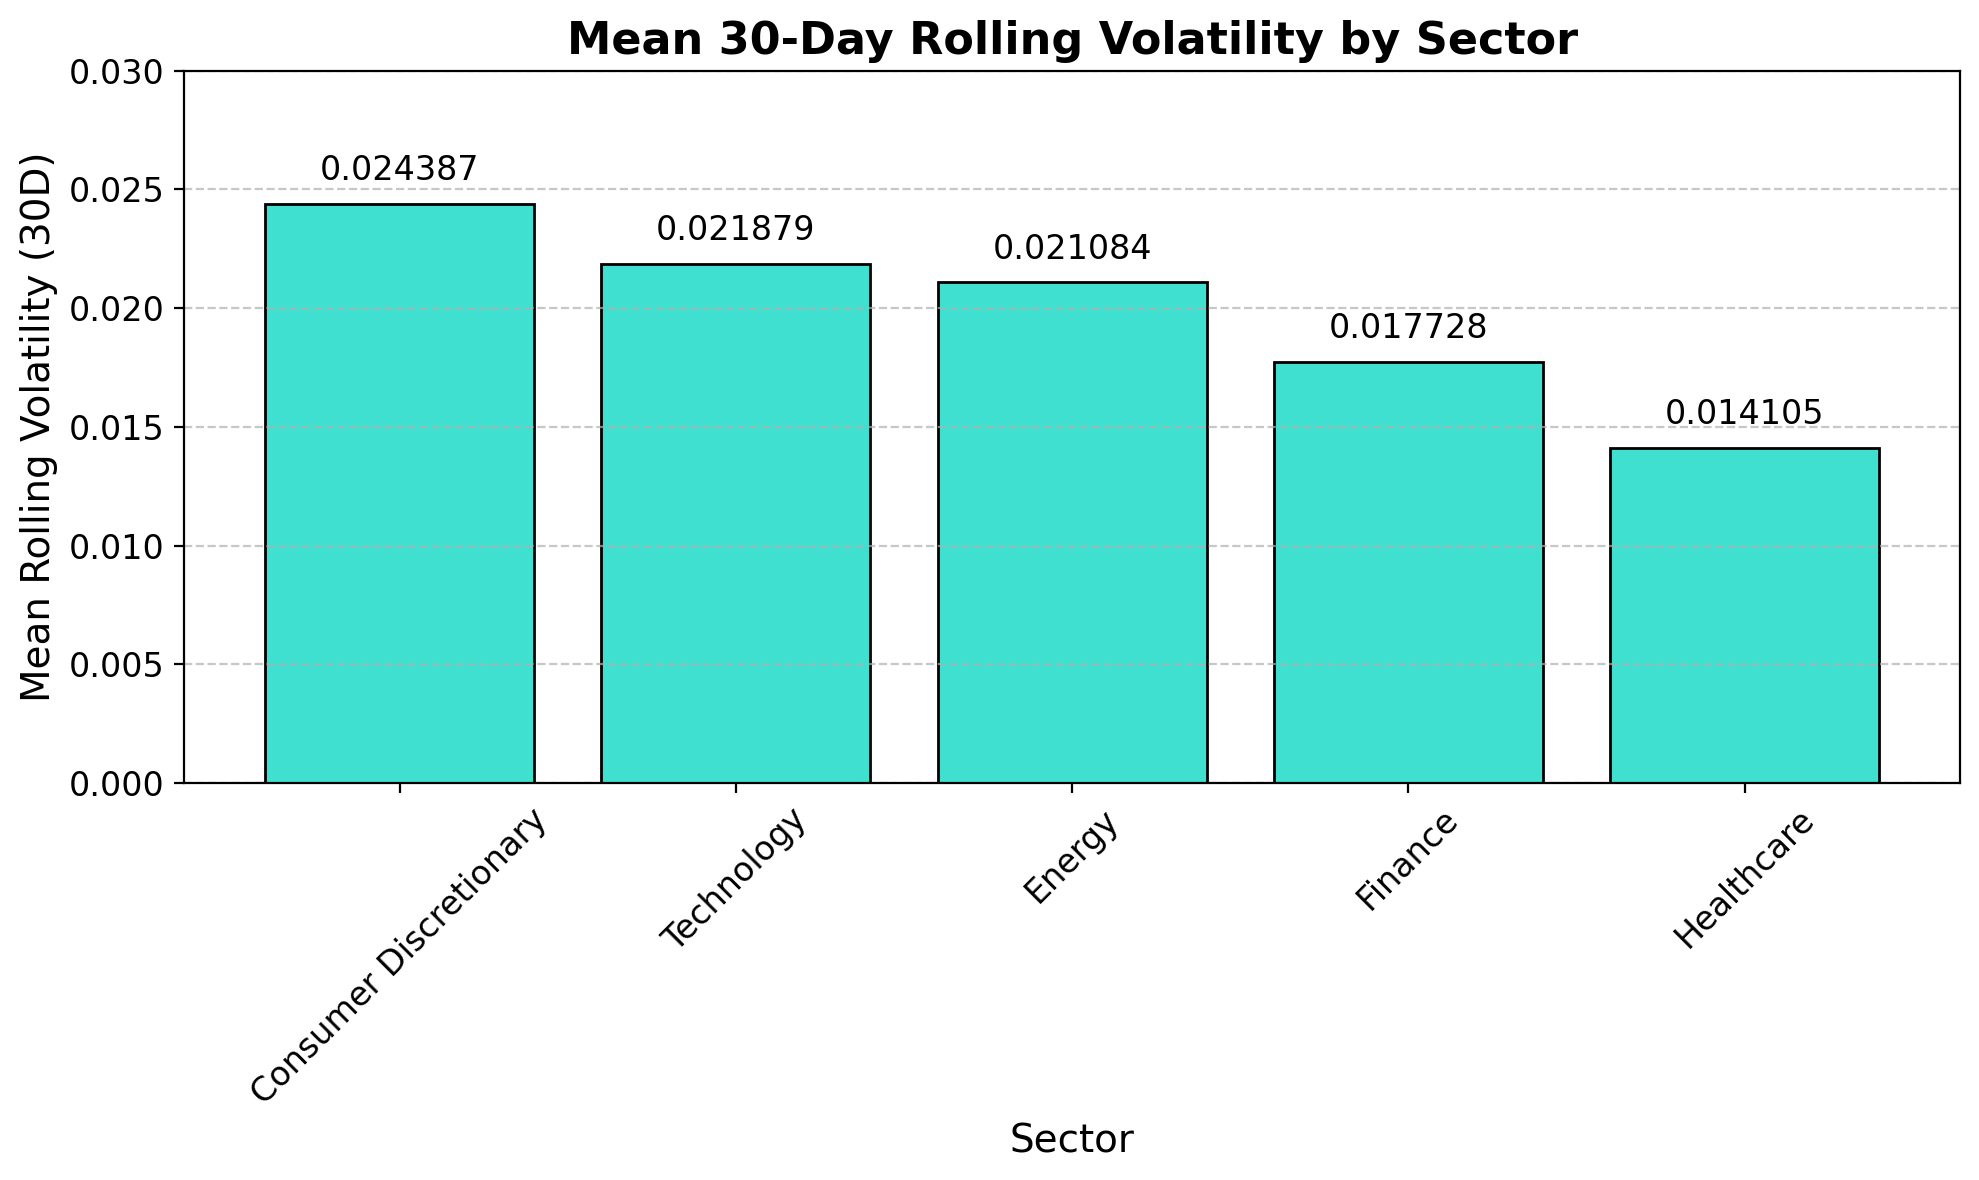

In [50]:
# Calculate mean volatilities for each sector
mean_volatilities = {}
for sector, stocks in sectors.items():
    sector_volatility = df[df[sector_column].isin(stocks)][volatility_column].mean()
    mean_volatilities[sector] = sector_volatility

vol_df = pd.DataFrame(list(mean_volatilities.items()), columns=["Sector", "Mean Volatility"])

# Sort by mean volatility 
vol_df = vol_df.sort_values(by="Mean Volatility", ascending=False)

plt.figure(figsize=(10, 6), dpi=200)
plt.bar(vol_df["Sector"], vol_df["Mean Volatility"], color="turquoise", edgecolor="black")

plt.title("Mean 30-Day Rolling Volatility by Sector", fontsize=16, fontweight="bold")
plt.xlabel("Sector", fontsize=14)
plt.ylabel("Mean Rolling Volatility (30D)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,0.03)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for index, value in enumerate(vol_df["Mean Volatility"]):
    plt.text(index, value + 0.001, f"{value:.6f}", ha="center", fontsize=12, color="black")

plt.tight_layout()
plt.savefig("Graphs/Mean 30-Day Rolling Volatility by Sector.jpg",dpi=200)
plt.show()

We can see that consumer discretionary tends to have the highest mean volatility with healthcare having the lowest.